<a href="https://colab.research.google.com/github/mohan844/Netflix_clustering/blob/main/capstone_project_4_Netflix_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name: Playstore App Review Analysis**



*   **Project Type: Unsupervised - Clustering.**
*   **Contibution: Individual**
*   **Team member: Lalit Mohan**






#**Project Summary -**

**The Netflix unsupervised clustering project aims to group Netflix users based on their viewing behavior. The project utilizes unsupervised clustering techniques such as KMeans and hierarchical algorithms to cluster users based on their viewing habits. The project includes exploratory data analysis (EDA) and principal component analysis (PCA) to reduce the dimensionality of the data. The goal is to gain insights into how users watch Netflix content, and to identify patterns and similarities between users.**

#**Problem Statement:**

**Netflix has a vast amount of data on user viewing behavior, but it can be challenging to gain insights from this data. With so much data available, it's difficult to identify patterns and similarities between users. The goal of this project is to use unsupervised clustering techniques to group users based on their viewing habits. By doing this, we can gain insights into how users watch Netflix content and identify groups of users that share similar viewing habits. This information can be used to personalize the Netflix experience for each user and to create targeted recommendations. However, the challenge is to reduce the dimensionality of the data and find the optimal number of clusters that accurately represent the user behavior. The project aims to solve this problem using EDA, PCA, KMeans, and hierarchical algorithms.**






#**Github Link:**

https://github.com/mohan844/Netflix_clustering

In [ ]:
# Import main lib:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Uploading the dataset:
df=pd.read_csv("/content/drive/MyDrive/Almabetter/Machine Learning/Capstone_Project_4_Netfliex_clustring/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [ ]:
# Head:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
# Tail:
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [ ]:
# Shape:
df.shape

(7787, 12)

In [ ]:
# Info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# Unique Values:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

**Number of Rows & Title are Same therefore there is no duplicay present.**

In [ ]:
# Null percentage in each column:
(df.isna().sum()/df.shape[0] * 100).round(2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [ ]:
# Treating the Null Values:
df['director'].fillna('unknown',inplace=True)
df['cast'].fillna('unknown',inplace=True)
df['country'].fillna('unknown',inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


In [ ]:
def function_1(dataframe,column_name):
  """ This Function two inputs as Dataframe and column name return list of unique lable in column , a dictionary keys as column label and value as total no of movies and another dictionary having values as total no of TV shows """
  # Filtering the Dataframe From Unknown:
  non_null = dataframe[dataframe[column_name] != 'unknown']

  # Creating a Unique list of column Labels:
  non_null[column_name] = non_null[column_name].apply(lambda z: z.split(','))
  unique_col_list = non_null[column_name].tolist()
  list_1 = [j.strip() for i in unique_col_list for j in i]
  unique_list_1 = list(set(list_1))

  # Creating a Movie Dictionary key as column label and counts as Total no of Movies:
  movie_df = non_null [non_null ['type']=='Movie']
  movie_list = movie_df[column_name].tolist()
  main_list_movie  = [j.strip() for i in movie_list for j in i]
  movie_dict = {}
  for i in unique_list_1:
    if i in main_list_movie:
      movie_dict[i] = main_list_movie.count(i)
    else:
      movie_dict[i] = 0

  # Creating a TV Dictionary key as column label and counts as Total no of TV shows:
  tv_df = non_null [non_null ['type']=='TV Show']
  tv_list = tv_df[column_name].tolist()
  main_list_tv  = [j.strip() for i in tv_list for j in i]
  tv_dict = {}
  for i in unique_list_1:
    if i in main_list_tv:
      tv_dict[i] = main_list_tv.count(i)
    else:
      tv_dict[i] = 0

  # Returning one list and two dictionary:
  return(movie_dict,tv_dict,unique_list_1 )

#**EDA:**

## **A. Univariate EDA:**

##1.Type:

In [ ]:
# Value counts on types:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

<Axes: >

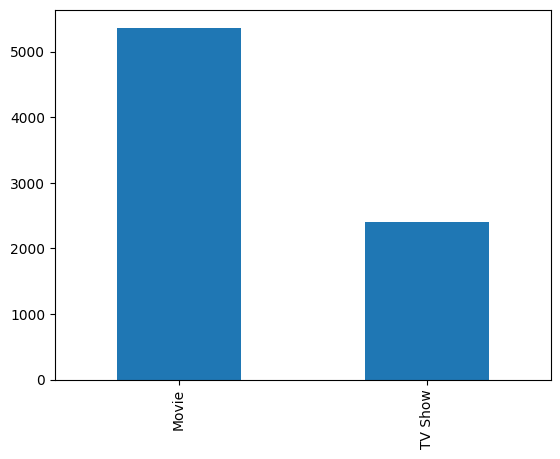

In [ ]:
# Ploting the distribution:
df['type'].value_counts().plot(kind='bar')

**Majority of Data Belongs to Movies**

##2. Director:

In [ ]:
# Calling the function_1
movie_director_dict,tv_director_dict, unique_director_list = function_1(df,'director')

# Creating a  Dictionary which we can pass it into DataFrame:
main_dict_director = {'director': unique_director_list,'Total no of Movies': list(movie_director_dict.values()),'Total no of TV Shows': list(tv_director_dict.values()),'Total no of Productions': [movie_director_dict[key] + tv_director_dict[key] for key in unique_director_list]}

# Creating a DataFrame:
director_df = pd.DataFrame(main_dict_director).sort_values(by='Total no of Productions',ascending=False).reset_index(drop=True)

In [ ]:
# Indexing the dataframe for univariate Analysis:
top_director = director_df.loc[:,['director','Total no of Productions']]

In [ ]:
# Top Ten:
top_director.head(10)

director  Total no of Productions
0            Jan Suter                       21
1          Raúl Campos                       19
2         Marcus Raboy                       16
3            Jay Karas                       15
4  Cathy Garcia-Molina                       13
5      Martin Scorsese                       12
6      Youssef Chahine                       12
7          Jay Chapman                       12
8     Steven Spielberg                       10
9      Shannon Hartman                        9

<Axes: ylabel='director'>

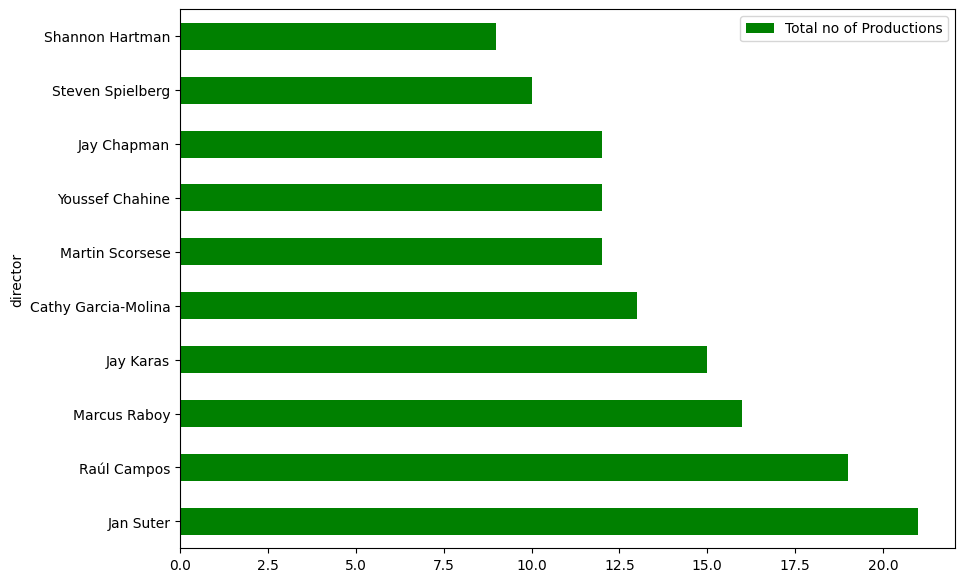

In [ ]:
# Ploting the Graph:
top_director.head(10).plot(kind='barh',x='director',figsize=(10,7),color='g')

**Based on the above data, we can conclude that Jan Suter is the director with the highest number of productions, with a total of 21 productions. Following Jan Suter, Raúl Campos and Marcus Raboy have directed 19 and 16 productions respectively.**

**Jay Karas, Cathy Garcia-Molina, Martin Scorsese, Youssef Chahine, Jay Chapman, Steven Spielberg, and Anurag Kashyap round out the top ten directors, each having directed between 9 and 15 productions.**

##3. Cast:

In [ ]:
# Calling the function_1
movie_cast_dict,tv_cast_dict,unique_cast_list = function_1(df,'cast')

# Creating a Dictionary which we can pass it into DataFrame:
main_dict_cast = {'cast': unique_cast_list,'Total no of Movies': list(movie_cast_dict.values()),'Total no of TV Shows': list(tv_cast_dict.values()),'Total no of Productions': [movie_cast_dict[key] + tv_cast_dict[key] for key in unique_cast_list]}

# Creating a DataFrame:
cast_df = pd.DataFrame(main_dict_cast).sort_values(by='Total no of Productions',ascending=False).reset_index(drop=True)

In [ ]:
# Indexing the dataframe for univariate Analysis:
top_cast = cast_df.loc[:,['cast','Total no of Productions']]

In [ ]:
# Top Ten:
top_cast.head(10)

cast  Total no of Productions
0       Anupam Kher                       42
1    Shah Rukh Khan                       35
2           Om Puri                       30
3  Naseeruddin Shah                       30
4      Akshay Kumar                       29
5  Takahiro Sakurai                       29
6  Amitabh Bachchan                       27
7         Yuki Kaji                       27
8       Boman Irani                       27
9      Paresh Rawal                       27

<Axes: ylabel='cast'>

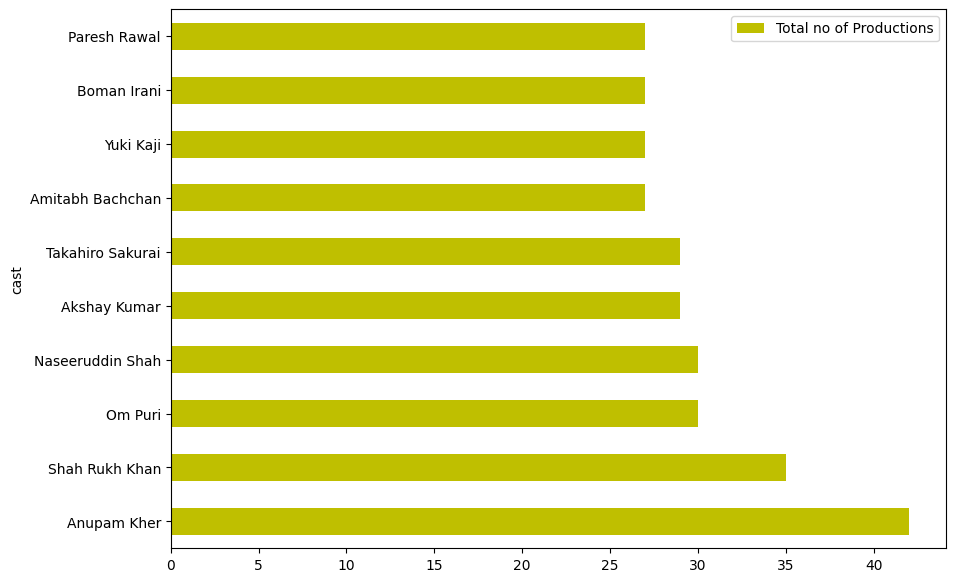

In [ ]:
# Ploting the Graph:
top_cast.head(10).plot(kind='barh',x='cast',figsize=(10,7),color='y')

**Conclusion is that the actors listed have been involved in the production of the number of films shown next to their names. Anupam Kher has been involved in the most productions with 42, followed by Shah Rukh Khan with 35, and then a tie between Om Puri and Naseeruddin Shah with 30 each. Akshay Kumar, Takahiro Sakurai, Boman Irani, Amitabh Bachchan, Yuki Kaji, and Paresh Rawal have all been involved in between 27 and 29 productions.**

##4. Country:

In [ ]:
# Calling the function_1
movie_country_dict,tv_country_dict,unique_country_list= function_1(df,'country')

# Creating a  Dictionary which we can pass it into DataFrame:
main_dict_country = {'country':unique_country_list, 'Movies':list(movie_country_dict.values()),'TV Shows':list(tv_country_dict.values()),'Total Productions': [movie_country_dict[key] + tv_country_dict[key] for key in unique_country_list]}

# Creating a DataFrame:
country_df = pd.DataFrame(main_dict_country).sort_values(by='Total Productions',ascending=False).reset_index(drop=True)

In [ ]:
# Indexing the dataframe for univariate Analysis:
top_country = country_df.loc[:,['country','Total Productions']]

In [ ]:
# Top Ten:
top_country.head(10)

country  Total Productions
0   United States               3288
1           India                990
2  United Kingdom                722
3          Canada                412
4          France                349
5           Japan                285
6           Spain                215
7     South Korea                212
8         Germany                199
9          Mexico                154

<Axes: xlabel='country'>

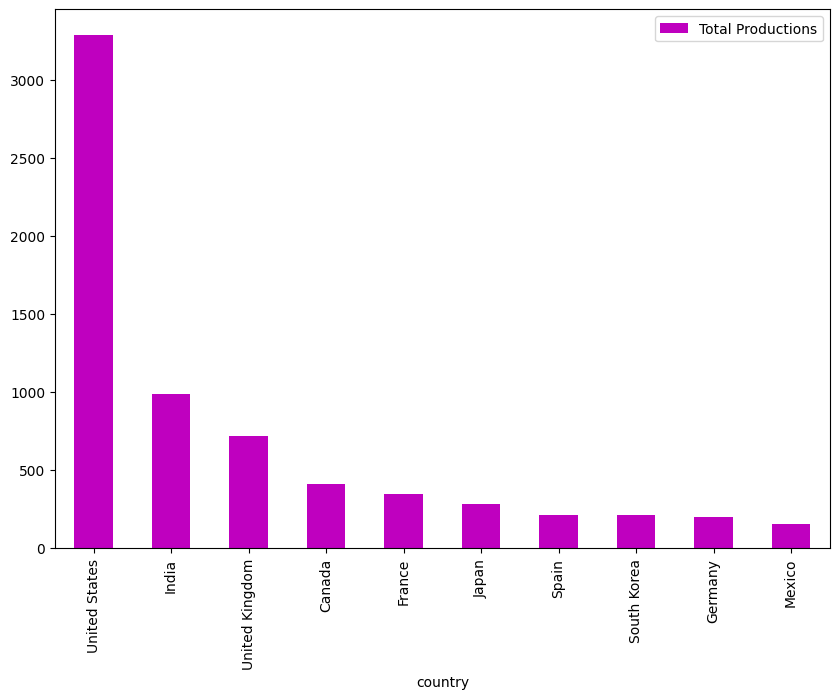

In [ ]:
# Ploting the Graph:
top_country.head(10).plot(kind='bar',x='country',figsize=(10,7),color='m')

**he United States has produced the highest number of productions with a total of 3288. India is second on the list with 990 productions, followed by the United Kingdom with 722 productions. Canada, France, Japan, Spain, South Korea, Germany, and Mexico have produced between 154 and 412 productions. This data suggests that the United States is the dominant player in the global entertainment industry, producing significantly more productions than any other country on the list.**

##5. Date Added:

In [ ]:
# Converting to Datetime object:
df['date_added'] = df['date_added'].apply(lambda z: datetime.strptime(z.strip(),'%B %d, %Y'))

In [ ]:
# Extracting year:
df['year'] = df['date_added'].apply(lambda z: int(z.strftime('%Y')))
# Extracting Month:
df['month'] = df['date_added'].apply(lambda z: z.strftime('%B'))
# Extracting week:
df['week'] = df['date_added'].apply(lambda z: z.strftime('%A'))

In [ ]:
max_date = df['date_added'].max()
min_date = df['date_added'].min()

# Calculate the total number of days between the maximum and minimum dates
num_days = (max_date - min_date).days

print(max_date, min_date, num_days,round(num_days/365))

2021-01-16 00:00:00 2008-01-01 00:00:00 4764 13


**We have Data of 13 years of Production.**

In [ ]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

<Axes: xlabel='week', ylabel='count'>

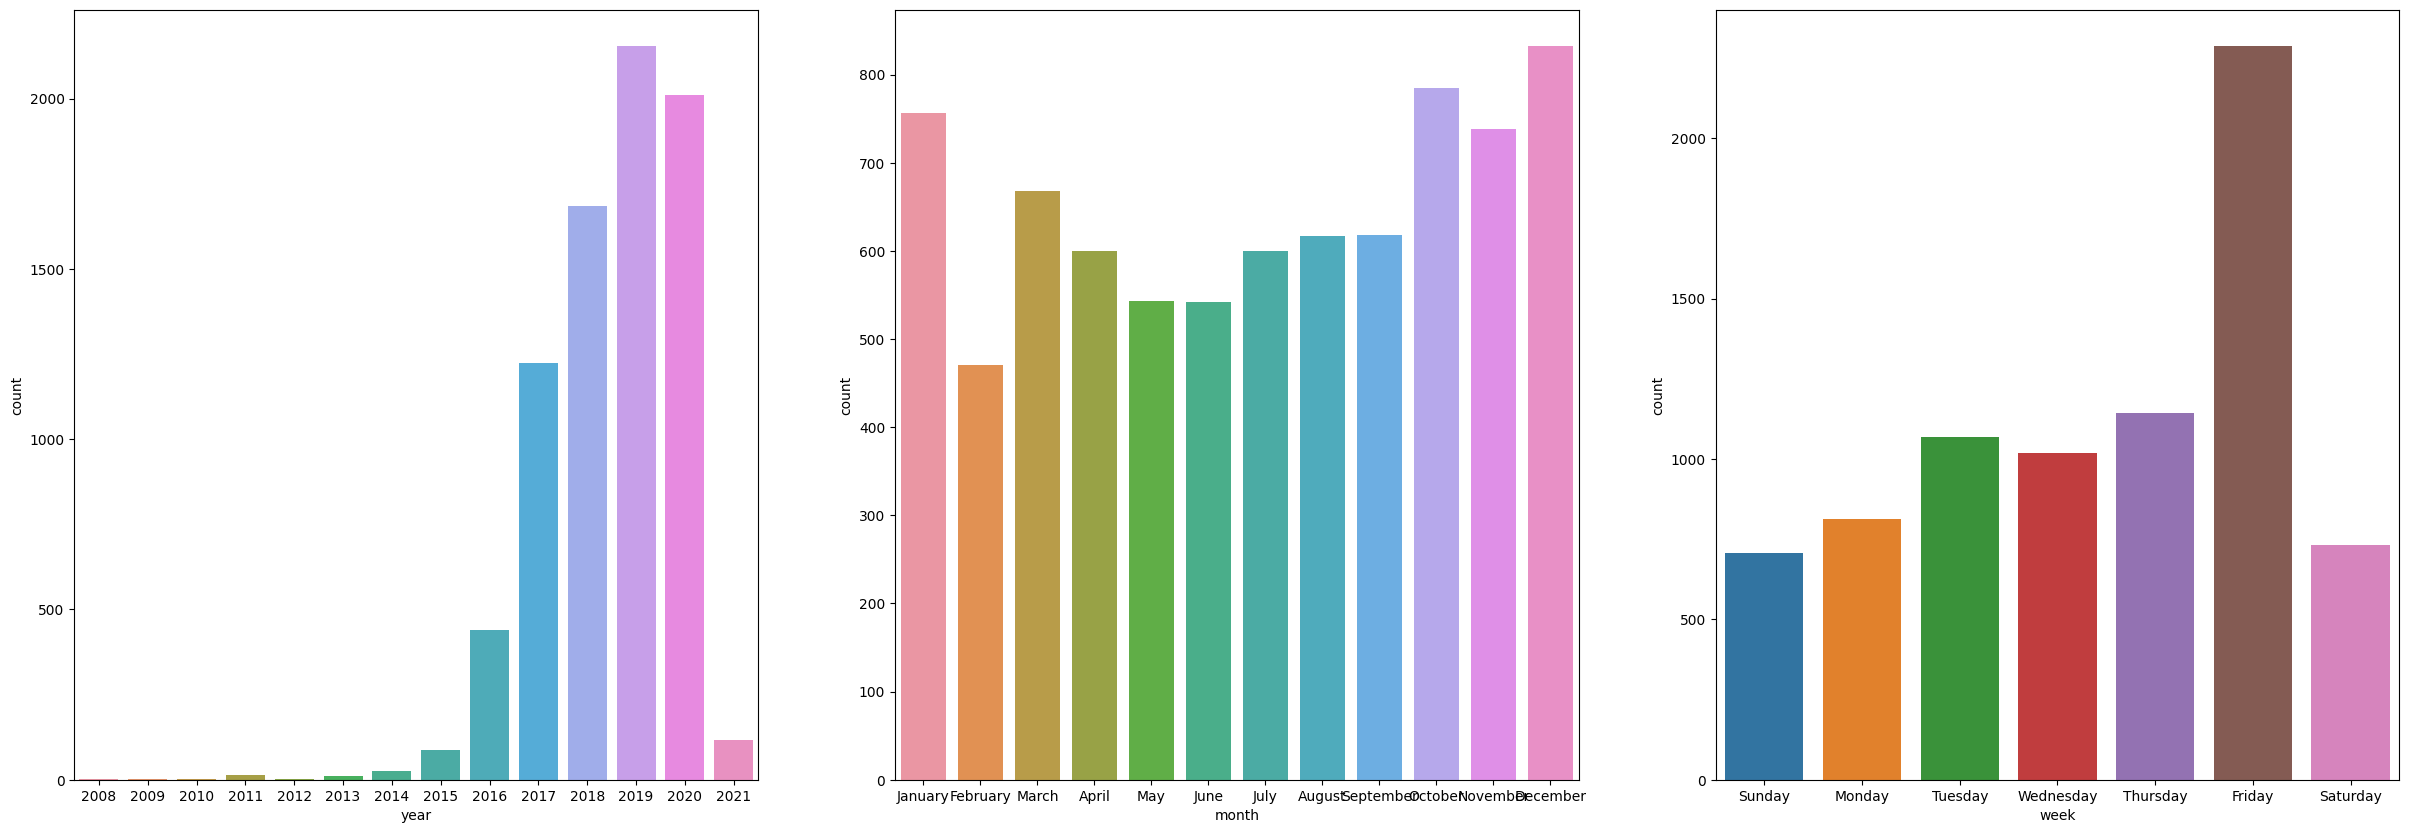

In [ ]:
# Ploting the graphs:
fig,axes = plt.subplots(1,3,figsize=(30,10))
sns.countplot(x='year', data=df,ax=axes[0])
sns.countplot(x='month', data=df,order=month_order, ax=axes[1])
sns.countplot(x='week', data=df,order=weekdays,ax=axes[2])



*   **There is a sudden increase in listing from year 2015 to 2019. In year 2020 there is a drop.**
*   **In terms of month there is a increase listing in starting and end of the year.**
*   **Majority of Movies are listed on Friday.**





##6. Release Year:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, '1925'),
  Text(1, 0, '1942'),
  Text(2, 0, '1943'),
  Text(3, 0, '1944'),
  Text(4, 0, '1945'),
  Text(5, 0, '1946'),
  Text(6, 0, '1947'),
  Text(7, 0, '1954'),
  Text(8, 0, '1955'),
  Text(9, 0, '1956'),
  Text(10, 0, '1958'),
  Text(11, 0, '1959'),
  Text(12, 0, '1960'),
  Text(13, 0, '1962'),
  Text(14, 0, '1963'),
  Text(15, 0, '1964'),
  Text(16, 0, '1965'),
  Text(17, 0, '1966'),
  Text(18, 0, '1967'),
  Text(19, 0, '1968'),
  Text(20, 0, '1969'),
  Text(21, 0, '1970'),
  Text(22, 0, '1971'),
  Text(23, 0, '1972'),
  Text(24, 0, '1973'),
  Text(25, 0, '1974'),
  Text(26, 0, '1975'),
  Text(27, 0, '1976'),
  Text(28, 0, '1977'),
  Text(29

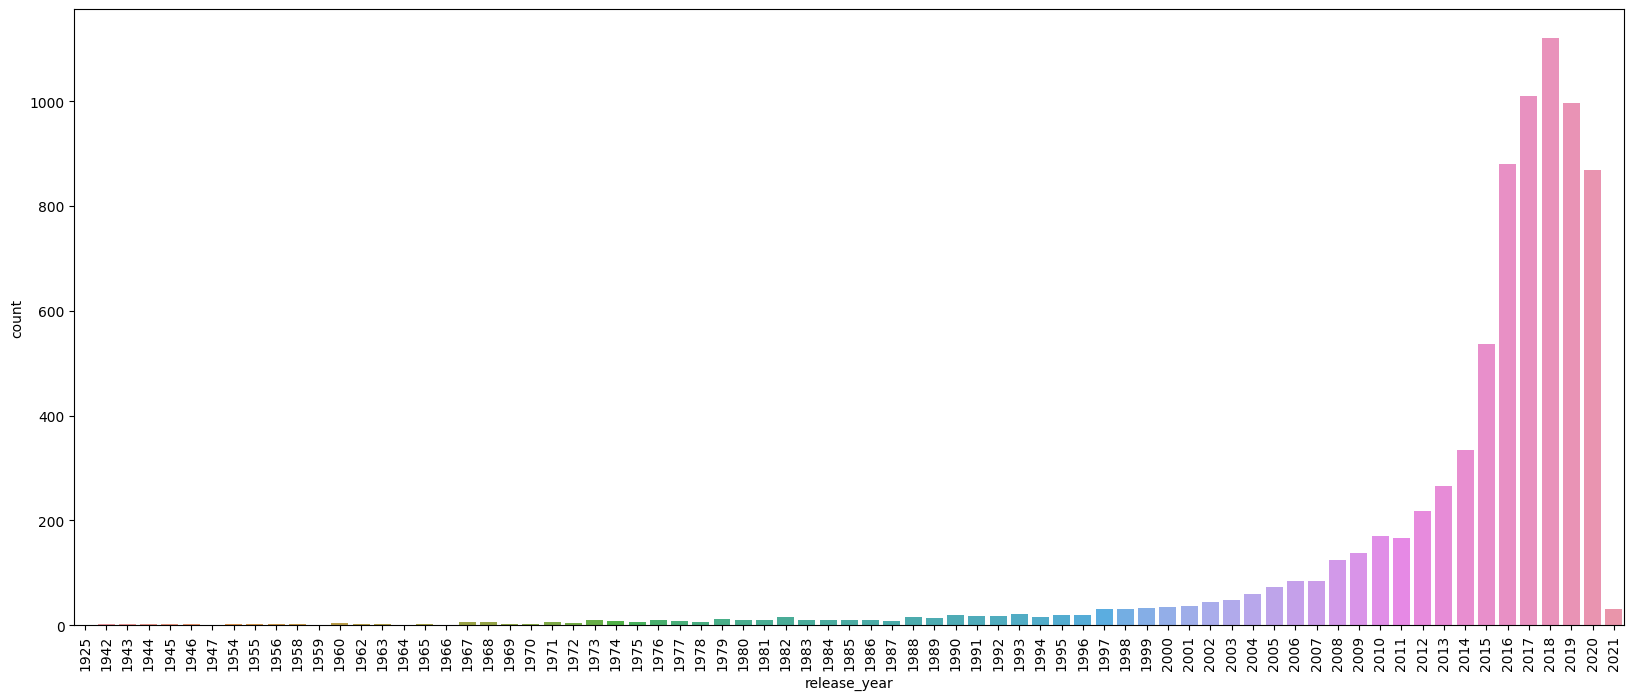

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x='release_year', data=df)
plt.xticks(rotation=90)



1.   **In this plot trend increases till year 2018**
2.   **In the listing graph of Netfliex 2019 is on top, while on year of release there is a sudden drop. It may be due to older movies or TV shows are listing on 2019.**



##7.Rating:

In [ ]:
# Value counts:
df['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

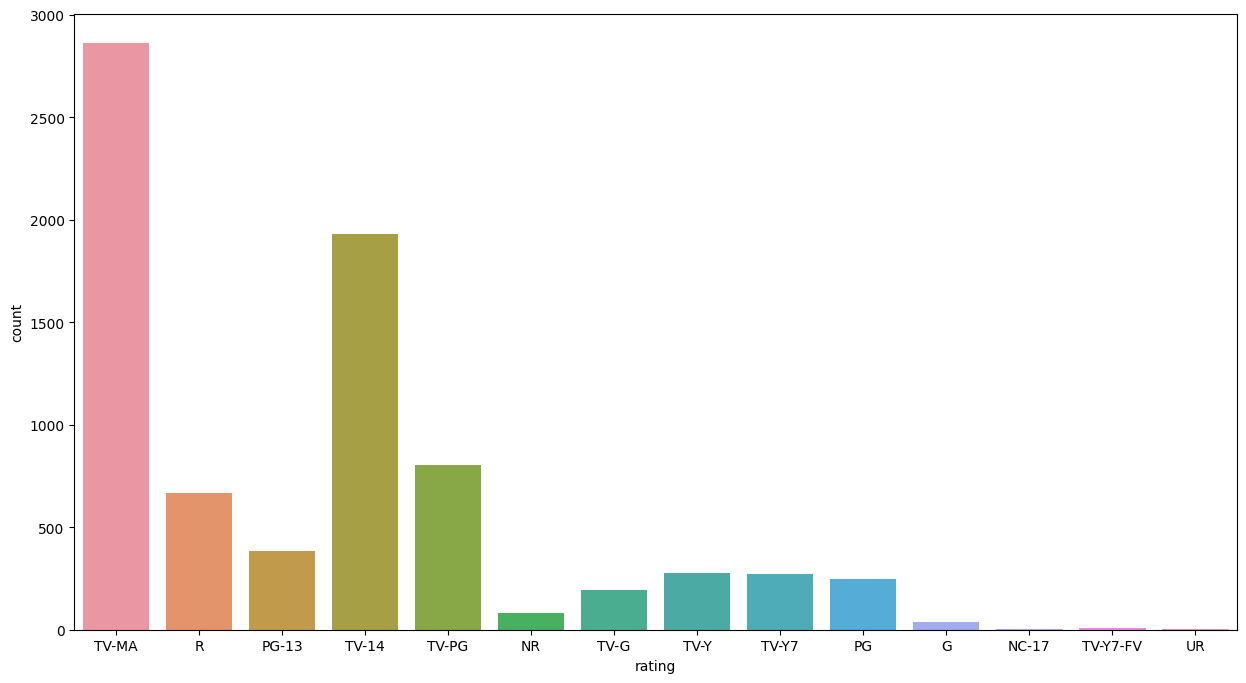

In [ ]:
# Ploting count plot:
plt.figure(figsize=(15,8))
sns.countplot(x='rating', data=df)


**It appears that the majority of the ratings in the given dataset are TV-MA and TV-14, with 2861 and 1928 occurrences, respectively. TV-PG and R ratings follow with 804 and 665 occurrences, respectively. The remaining ratings have comparatively fewer occurrences, with G and NR having the least with 39 and 83 occurrences, respectively.**

##8. Listed in / Genres :

In [ ]:
# Code for Unique Genres:
df['listed_in_list'] = df['listed_in'].apply(lambda z: z.split(','))
listed_list = df['listed_in_list'].tolist()
main_listed = [j.strip() for i in listed_list for j in i]
unique_listed = list(set(main_listed ))

In [ ]:
# Unique Genres:
unique_listed

['TV Horror',
 'British TV Shows',
 'Documentaries',
 'Crime TV Shows',
 'Sports Movies',
 'TV Thrillers',
 'International Movies',
 'Romantic Movies',
 'Science & Nature TV',
 'Classic Movies',
 'Horror Movies',
 'Sci-Fi & Fantasy',
 'Classic & Cult TV',
 'Teen TV Shows',
 "Kids' TV",
 'Music & Musicals',
 'TV Mysteries',
 'Docuseries',
 'TV Comedies',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'Romantic TV Shows',
 'Reality TV',
 'Spanish-Language TV Shows',
 'TV Shows',
 'Cult Movies',
 'Anime Features',
 'Thrillers',
 'Action & Adventure',
 'TV Dramas',
 'Stand-Up Comedy',
 'International TV Shows',
 'Movies',
 'Faith & Spirituality',
 'LGBTQ Movies',
 'Dramas',
 'Anime Series',
 'Independent Movies',
 'Children & Family Movies',
 'Comedies',
 'Korean TV Shows',
 'TV Sci-Fi & Fantasy']

In [ ]:
# Code for Number of Movies listed on Genres:
movie_listed_in = df[df['type']=='Movie']
movie_listed_in_list = movie_listed_in['listed_in_list'].tolist()
list_1  = [j.strip() for i in movie_listed_in_list for j in i]
unique_list_1 = list(set(list_1))
movie_listed_in_dict = {}
# For Loop for appending a dictionary key as genres and count as value:
for i in unique_list_1:
  movie_listed_in_dict[i] = list_1.count(i)
# Creating a Dictionary which we can pass it into DataFrame:
dict_1 = {'Genres':movie_listed_in_dict.keys(), 'Movies':movie_listed_in_dict.values()}
# Creating a DataFrame:
df_1 = pd.DataFrame(dict_1).sort_values(by='Movies',ascending=False).reset_index(drop=True)

In [ ]:
df_1

Genres  Movies
0       International Movies    2437
1                     Dramas    2105
2                   Comedies    1471
3              Documentaries     786
4         Action & Adventure     721
5         Independent Movies     673
6   Children & Family Movies     532
7            Romantic Movies     531
8                  Thrillers     491
9            Stand-Up Comedy     329
10          Music & Musicals     321
11             Horror Movies     312
12          Sci-Fi & Fantasy     218
13             Sports Movies     196
14            Classic Movies     103
15              LGBTQ Movies      90
16               Cult Movies      59
17            Anime Features      57
18      Faith & Spirituality      57
19                    Movies      52

**the most common genres for movies in the given dataset are International Movies, Dramas, and Comedies, with 2437, 2105, and 1471 occurrences, respectively. The genres with relatively fewer occurrences include Anime Features, Faith & Spirituality, and Cult Movies, with 57, 57, and 59 occurrences, respectively.**

<Axes: ylabel='Genres'>

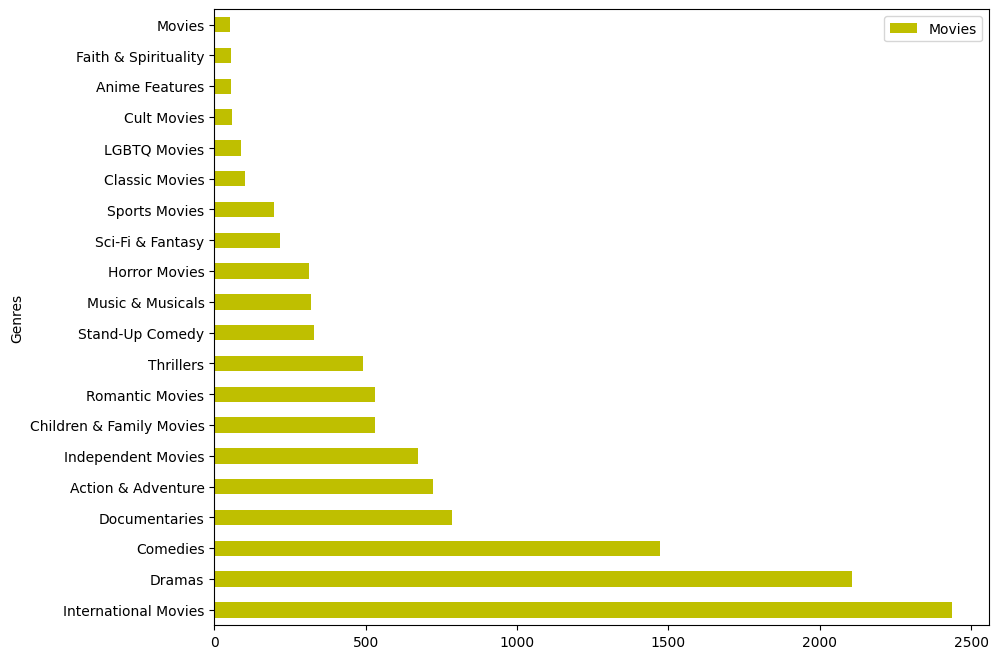

In [ ]:
# Ploting the graph:
df_1.plot(kind='barh',x='Genres',y='Movies',figsize=(10,8),color='y')

In [ ]:
# Code for Number of TV Shows listed on Genres:
tv_listed_in = df[df['type']=='TV Show']
tv_listed_in_list = tv_listed_in['listed_in_list'].tolist()
list_2  = [j.strip() for i in tv_listed_in_list for j in i]
unique_list_2 = list(set(list_2))
tv_listed_in_dict = {}
# For Loop for appending a dictionary key as genres and count as value:
for i in unique_list_2:
  tv_listed_in_dict[i] = list_2.count(i)
# Creating a Dictionary which we can pass it into DataFrame:
dict_2 = {'Genres':tv_listed_in_dict.keys(), 'TV shows':tv_listed_in_dict.values()}
# Creating a DataFrame:
df_2 = pd.DataFrame(dict_2).sort_values(by='TV shows',ascending=False).reset_index(drop=True)

In [ ]:
df_2 

Genres  TV shows
0         International TV Shows      1197
1                      TV Dramas       703
2                    TV Comedies       517
3                 Crime TV Shows       426
4                       Kids' TV       411
5                     Docuseries       352
6              Romantic TV Shows       333
7               British TV Shows       231
8                     Reality TV       222
9                Korean TV Shows       150
10         TV Action & Adventure       149
11                  Anime Series       146
12     Spanish-Language TV Shows       146
13                  TV Mysteries        90
14           Science & Nature TV        85
15           TV Sci-Fi & Fantasy        75
16                     TV Horror        69
17                 Teen TV Shows        60
18  Stand-Up Comedy & Talk Shows        52
19                  TV Thrillers        50
20             Classic & Cult TV        25
21                      TV Shows        12

<Axes: ylabel='Genres'>

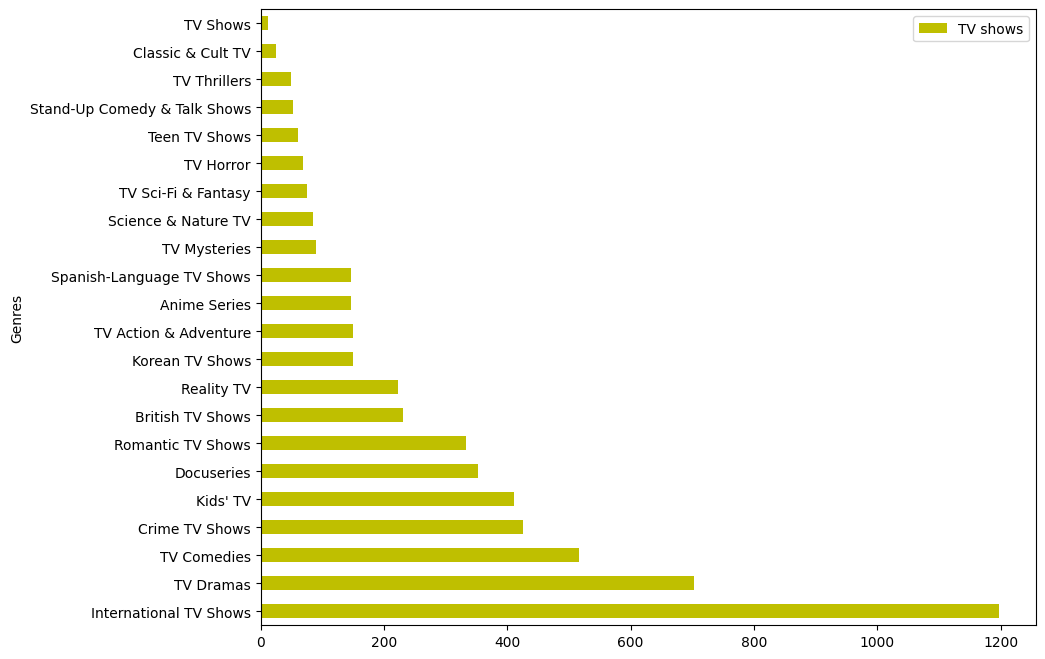

In [ ]:
# Ploting the graph:
df_2.plot(kind='barh',x='Genres',y='TV shows',figsize=(10,8),color='y')

**The most common genres for TV shows in the given dataset are International TV Shows, TV Dramas, and TV Comedies, with 1197, 703, and 517 occurrences, respectively. Crime TV Shows, Kids' TV, and Docuseries follow closely behind with 426, 411, and 352 occurrences, respectively.**
**The genres with relatively fewer occurrences include Classic & Cult TV, TV Shows, and TV Thrillers, with 25, 12, and 50 occurrences, respectively.**

##9. Duration:

In [ ]:
# Seprating the dataframe:
movie_df = df[df['type']=='Movie']
tv_df = df[df['type']=='TV Show']

In [ ]:
# Value counts For TV shows:
tv_df['duration'].value_counts()

1 Season      1606
2 Seasons      378
3 Seasons      183
4 Seasons       86
5 Seasons       57
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       5
11 Seasons       2
12 Seasons       2
15 Seasons       2
13 Seasons       1
16 Seasons       1
Name: duration, dtype: int64

In [ ]:
# Code for Converting movies duration from object type to int:
movie_df['duration'] = movie_df['duration'].apply(lambda z: int(z.replace(' min','')))
tv_df['duration'] = tv_df['duration'].apply(lambda z: int(z[:2]))

<Axes: >

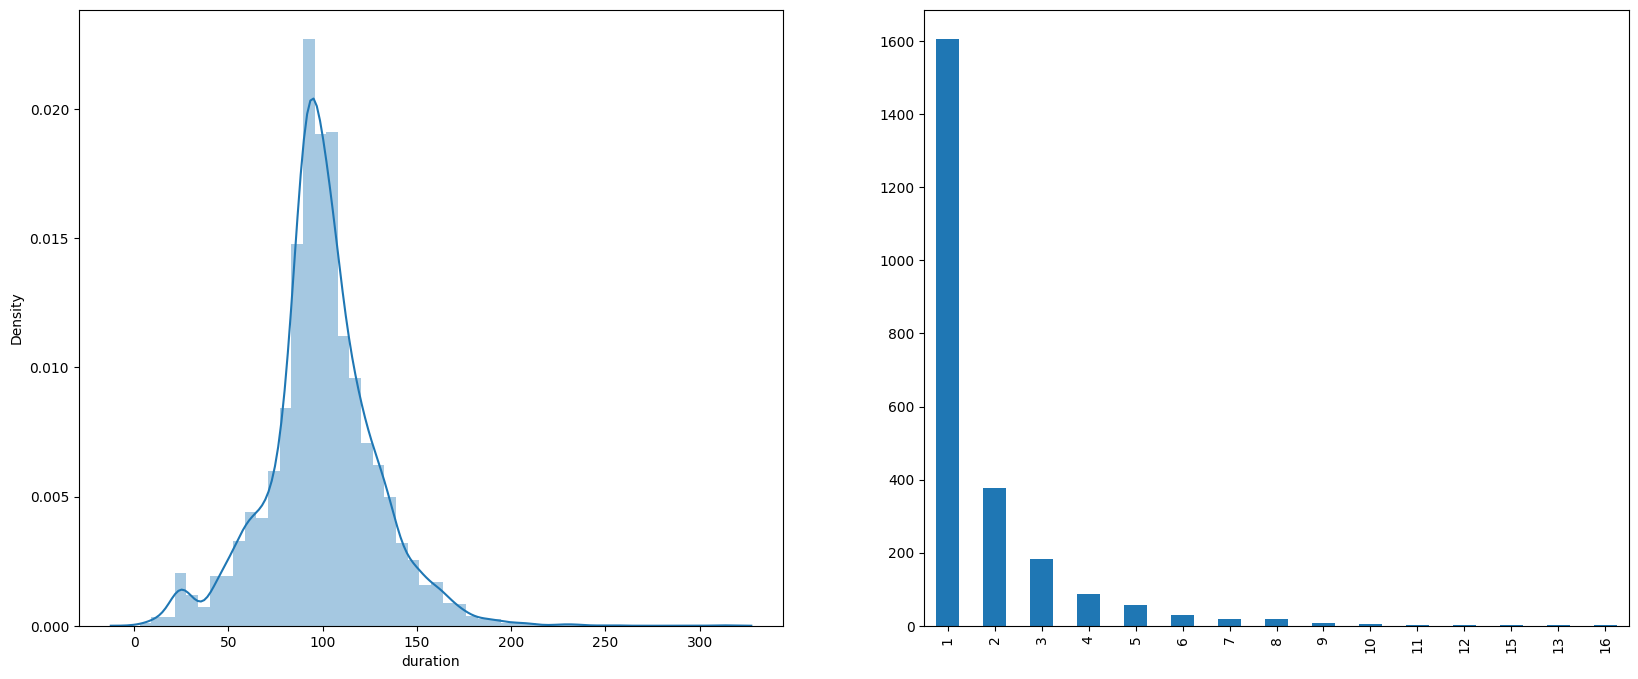

In [ ]:
# Ploting the distribution:
fig,axes = plt.subplots(1,2,figsize=(20,8))
sns.distplot(movie_df['duration'], kde=True,ax=axes[0])
tv_df['duration'].value_counts().plot(kind='bar',ax=axes[1])

**Conclusion:**

*   **Majority of Movies Distributed between 75 min to 125 min**
*   **Majority of TV shows has seasons 1. only one season has season 16.**



## **B. Bi-Variate EDA:**

##1. Type VS Director:

In [ ]:
# director_ df dataframe:
director_df.head()

director  Total no of Movies  Total no of TV Shows  \
0            Jan Suter                  21                     0   
1          Raúl Campos                  19                     0   
2         Marcus Raboy                  15                     1   
3            Jay Karas                  15                     0   
4  Cathy Garcia-Molina                  13                     0   

   Total no of Productions  
0                       21  
1                       19  
2                       16  
3                       15  
4                       13

<Axes: xlabel='director'>

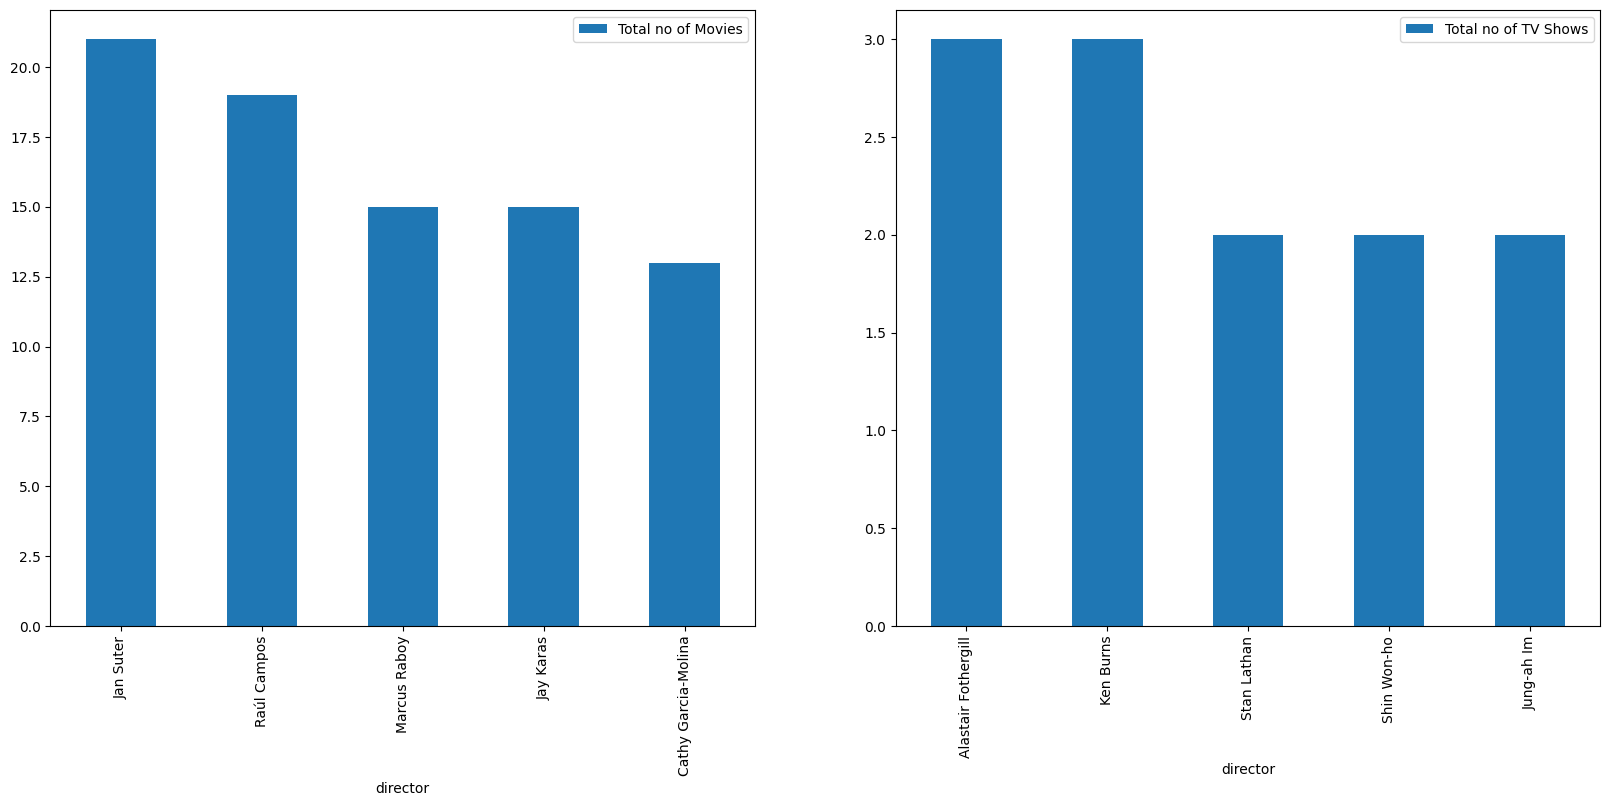

In [ ]:
# Ploting the top director in terms of movies and TV shows:
fig,axes = plt.subplots(1,2,figsize=(20,8))
director_df.sort_values(by='Total no of TV Shows',ascending=False).head().plot(kind='bar',x='director',y='Total no of TV Shows',ax=axes[1])
director_df.sort_values(by='Total no of Movies',ascending=False).head().plot(kind='bar',x='director',y='Total no of Movies',ax=axes[0])

##2. Type VS Cast:

In [ ]:
# cast_ df dataframe:
cast_df.head()

cast  Total no of Movies  Total no of TV Shows  \
0       Anupam Kher                  41                     1   
1    Shah Rukh Khan                  35                     0   
2           Om Puri                  30                     0   
3  Naseeruddin Shah                  30                     0   
4      Akshay Kumar                  29                     0   

   Total no of Productions  
0                       42  
1                       35  
2                       30  
3                       30  
4                       29

<Axes: xlabel='cast'>

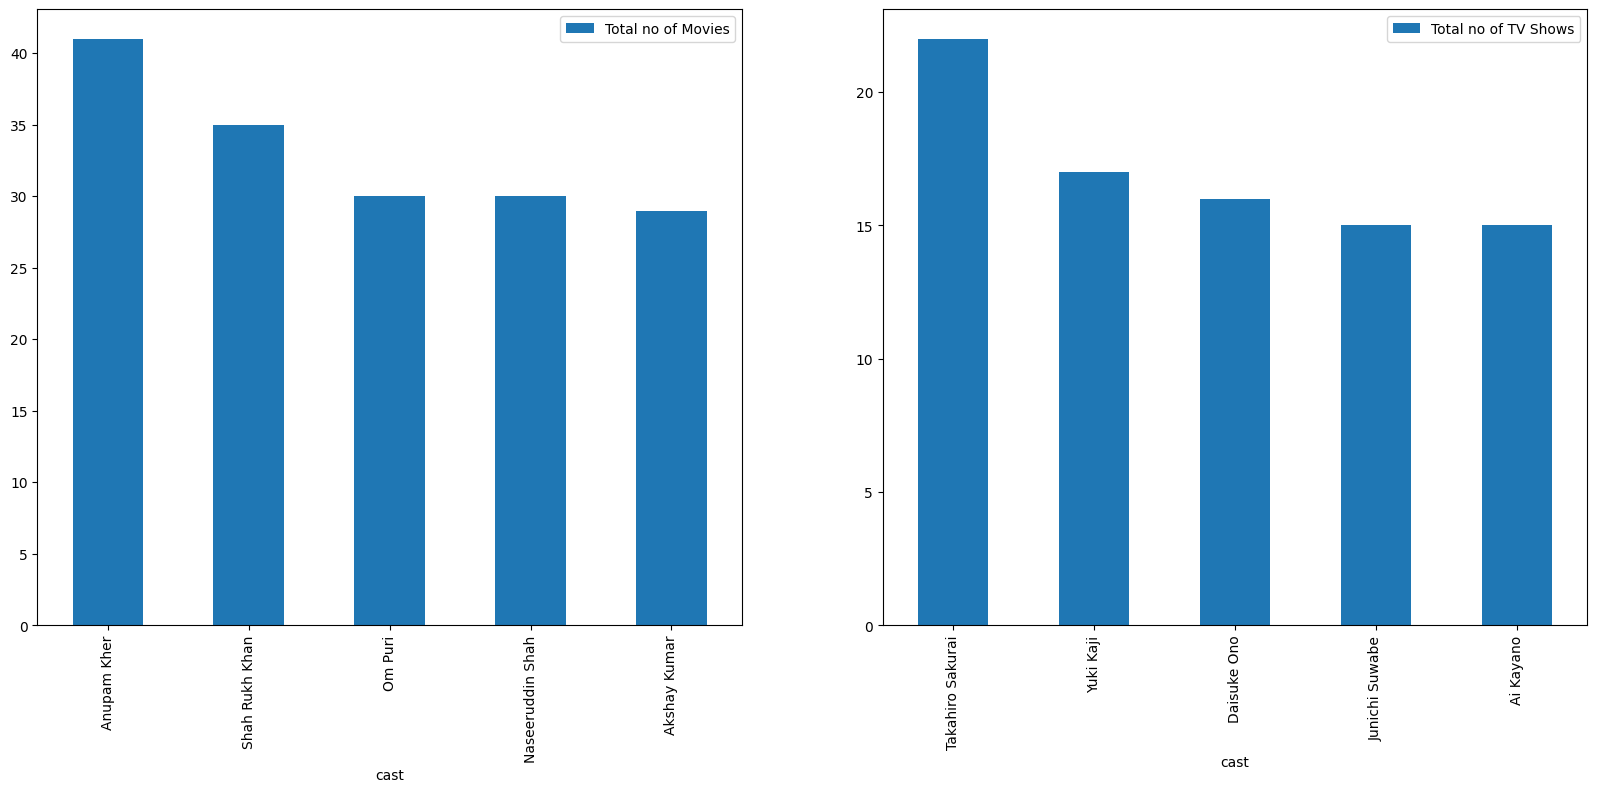

In [ ]:
# Ploting the top cast in terms of movies and TV shows:
fig,axes = plt.subplots(1,2,figsize=(20,8))
cast_df.sort_values(by='Total no of TV Shows',ascending=False).head().plot(kind='bar',x='cast',y='Total no of TV Shows',ax=axes[1])
cast_df.sort_values(by='Total no of Movies',ascending=False).head().plot(kind='bar',x='cast',y='Total no of Movies',ax=axes[0])

##3. Type VS Country:

In [ ]:
country_df.head()

country  Movies  TV Shows  Total Productions
0   United States    2428       860               3288
1           India     915        75                990
2  United Kingdom     467       255                722
3          Canada     286       126                412
4          France     265        84                349

<Axes: xlabel='country'>

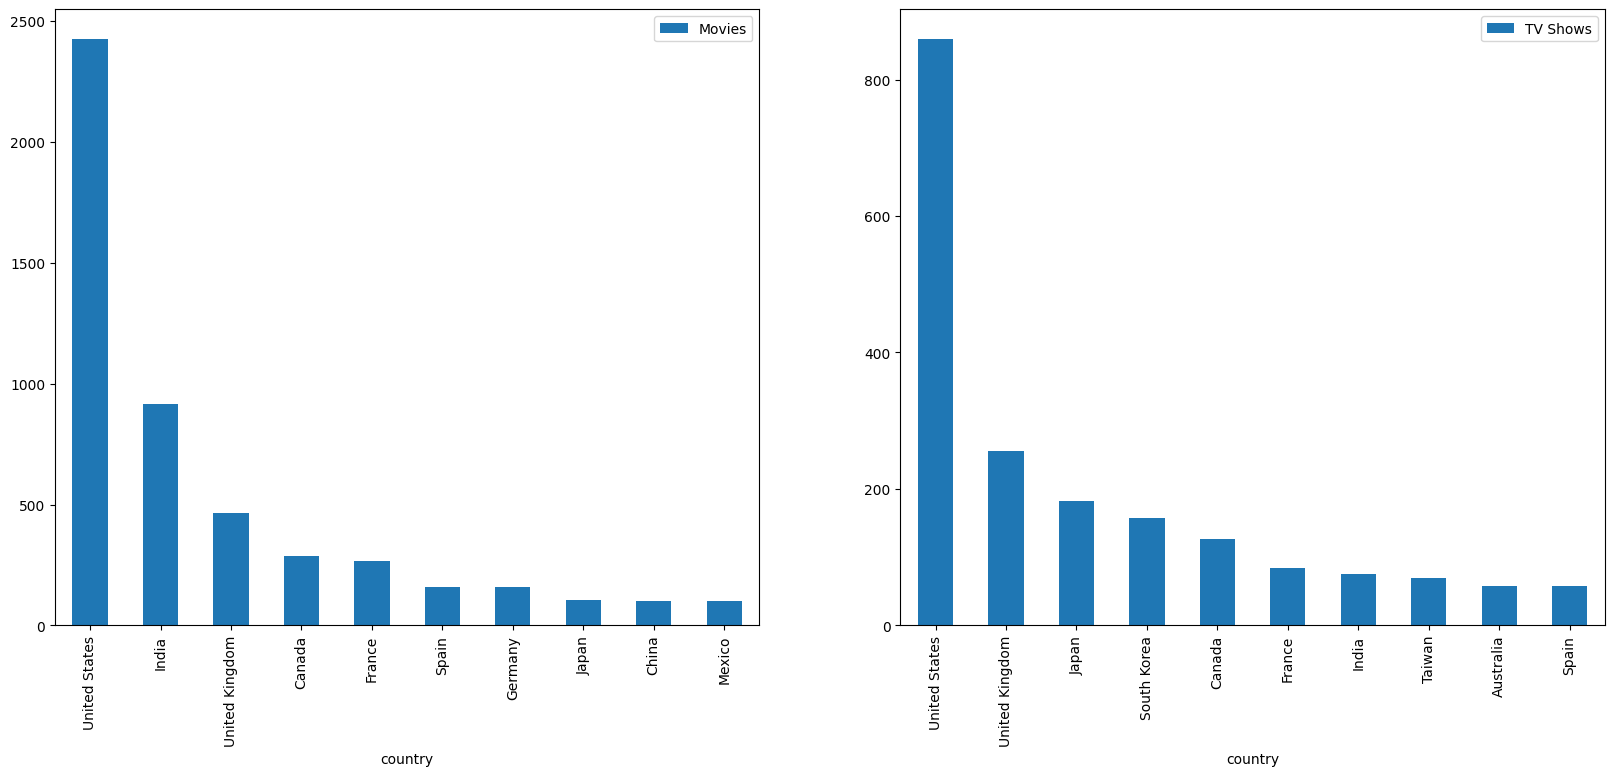

In [ ]:
# Ploting the top country in terms of movies and TV shows:
fig,axes = plt.subplots(1,2,figsize=(20,8))
country_df.sort_values(by='TV Shows',ascending=False).head(10).plot(kind='bar',x='country',y='TV Shows',ax=axes[1])
country_df.sort_values(by='Movies',ascending=False).head(10).plot(kind='bar',x='country',y='Movies',ax=axes[0])

**Conclusion:**

*   **The United States has produced the most TV shows with 860, followed by the United Kingdom with 255 and Japan with 182. South Korea, Canada, France, India, Taiwan, Australia, and Spain also have produced a significant number of TV shows, ranging from 157 to 57.**
*   **The United States has produced the most movies with 2428, followed by India with 915 and the United Kingdom with 467. Canada, France, Spain, Germany, Japan, China, and Mexico also have produced a significant number of movies, ranging from 286 to 101.**



##4. Type VS rating:

<Axes: xlabel='rating', ylabel='count'>

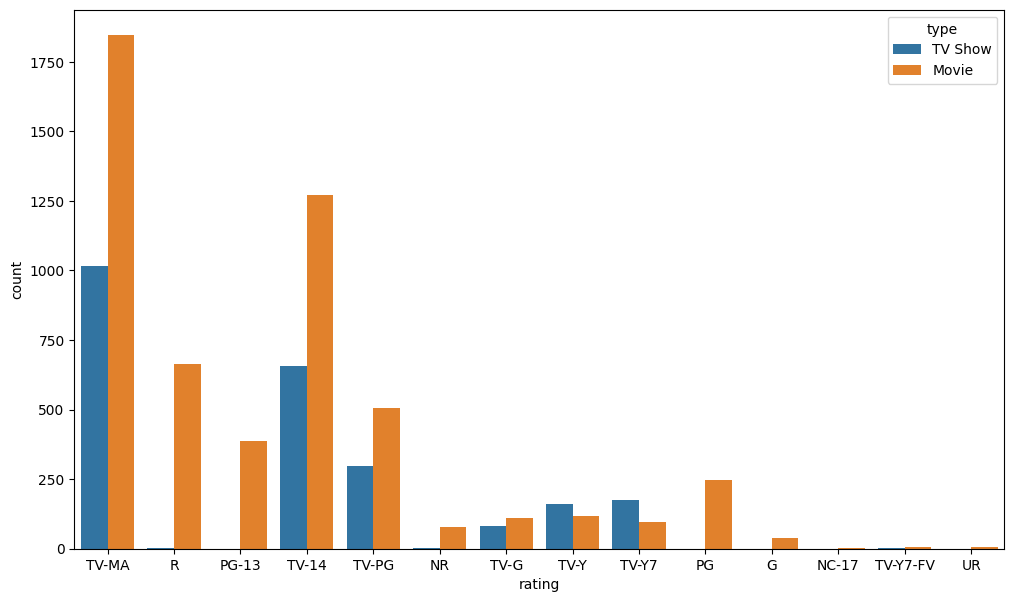

In [ ]:
# Count plot graph:
plt.figure(figsize=(12,7))
sns.countplot(x='rating',hue='type',data=df)

**the majority of the productions are rated TV-14 and TV-MA, with 1272 movies and 656 TV shows rated TV-14 and 1845 movies and 1016 TV shows rated TV-MA.**

**In terms of movies, R-rated movies have the highest count with 663, followed by PG-13 with 386 and PG with 247. NR rated movies have a count of 79, while G and NC-17 rated movies have much lower counts of 39 and 3, respectively. UR rated movies have the lowest count at just 5.**

**For TV shows, TV-14 rated shows have the highest count with 656, followed by TV-MA with 1016 and TV-PG with 299. TV-Y and TV-Y7 rated shows have counts of 162 and 175, respectively, while the TV-Y7-FV rating has the lowest count at just 1.**

**These numbers suggest that TV-14 and TV-MA rated productions are the most popular among viewers, while R-rated movies and TV-MA rated TV shows are also popular. G-rated movies have the lowest count, indicating that these types of movies are less popular among viewers.**

##5. Type VS Date Added on Netflix:

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

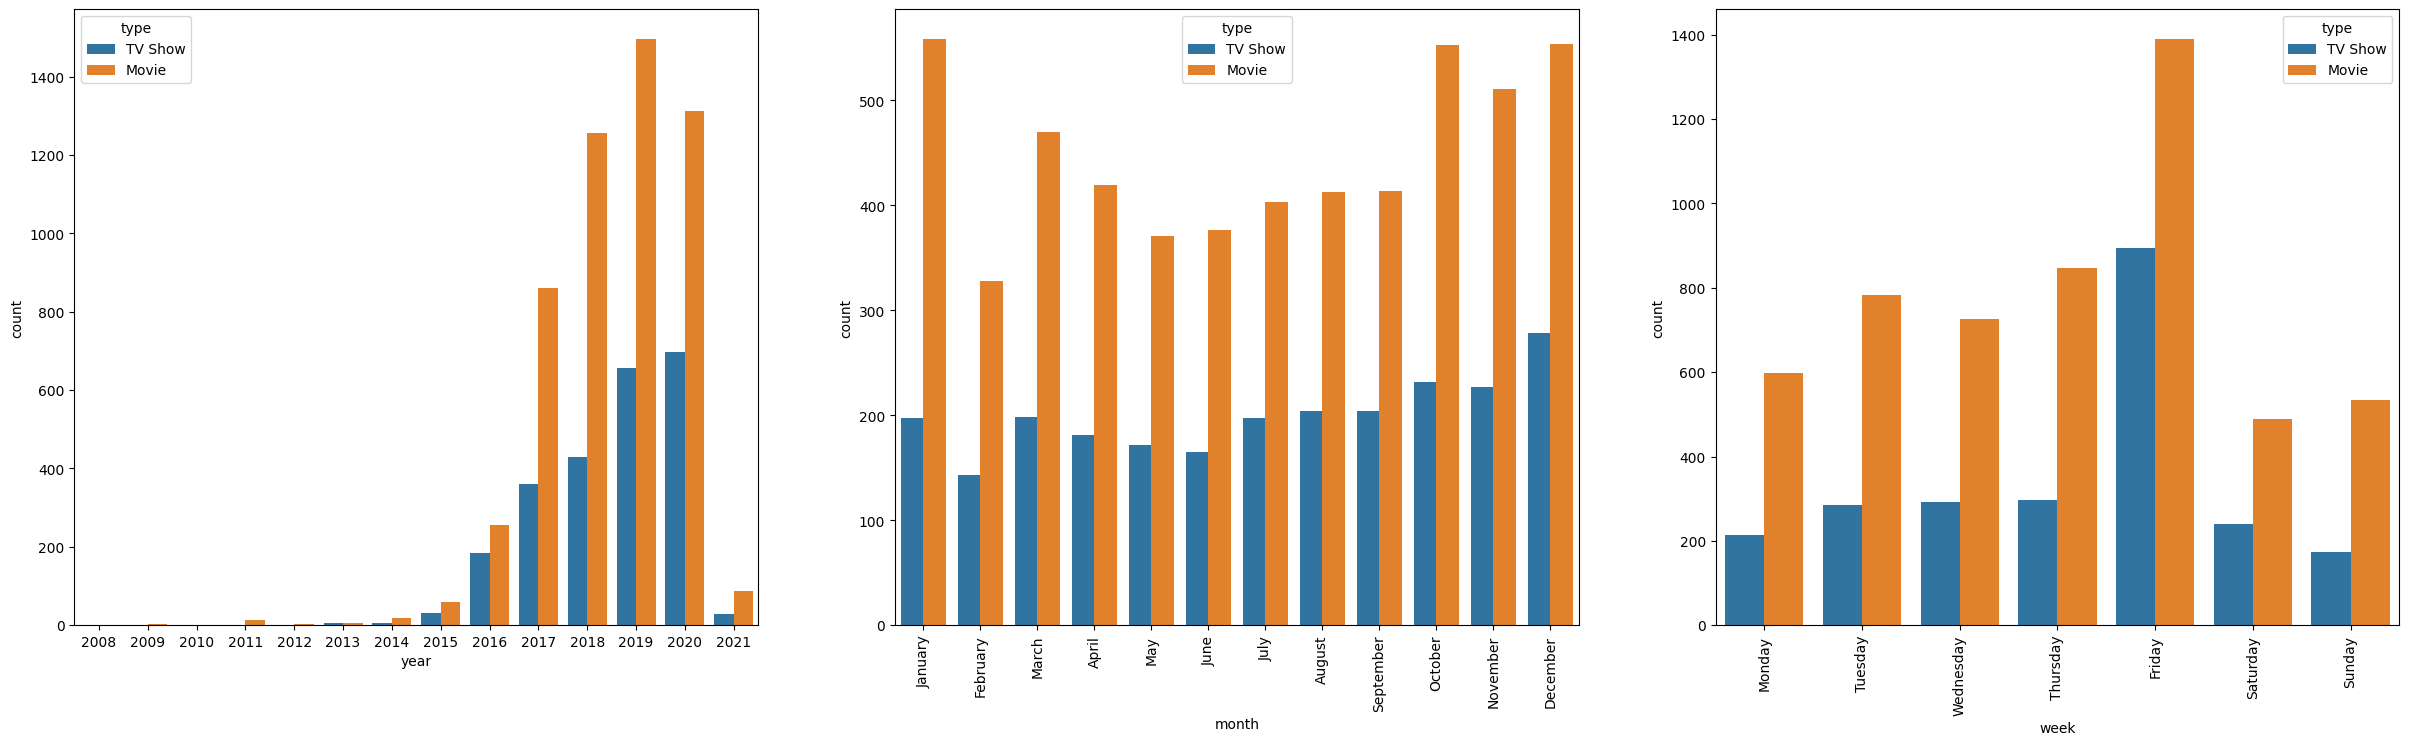

In [ ]:
# Plotting count Subplots:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fig,axes = plt.subplots(1,3,figsize=(30,8))
sns.countplot(x='year',hue='type',data=df,ax=axes[0])
sns.countplot(x='month',hue='type',data=df,ax=axes[1],order=months)
sns.countplot(x='week',hue='type',data=df,ax=axes[2],order=weekdays)
axes[1].set_xticklabels(months, rotation=90)
axes[2].set_xticklabels(weekdays, rotation=90)

**Conclusion:**

*   **In terms of movies, always ahead of TV shows. In year Section trend increases till 2019, in year 2020 there is a drop. On other hand TV series trends increases along with year.**
*   **In month plot, mostly movies are listed at end and beginning of month,Except Feburary. In respect of series variation among the month is not as high as movies, but trend is quit similat to movies.**
*  **Most Movies and TV Series are listed on Friday.**






##5. Type VS Year of Release:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, '1925'),
  Text(1, 0, '1942'),
  Text(2, 0, '1943'),
  Text(3, 0, '1944'),
  Text(4, 0, '1945'),
  Text(5, 0, '1946'),
  Text(6, 0, '1947'),
  Text(7, 0, '1954'),
  Text(8, 0, '1955'),
  Text(9, 0, '1956'),
  Text(10, 0, '1958'),
  Text(11, 0, '1959'),
  Text(12, 0, '1960'),
  Text(13, 0, '1962'),
  Text(14, 0, '1963'),
  Text(15, 0, '1964'),
  Text(16, 0, '1965'),
  Text(17, 0, '1966'),
  Text(18, 0, '1967'),
  Text(19, 0, '1968'),
  Text(20, 0, '1969'),
  Text(21, 0, '1970'),
  Text(22, 0, '1971'),
  Text(23, 0, '1972'),
  Text(24, 0, '1973'),
  Text(25, 0, '1974'),
  Text(26, 0, '1975'),
  Text(27, 0, '1976'),
  Text(28, 0, '1977'),
  Text(29

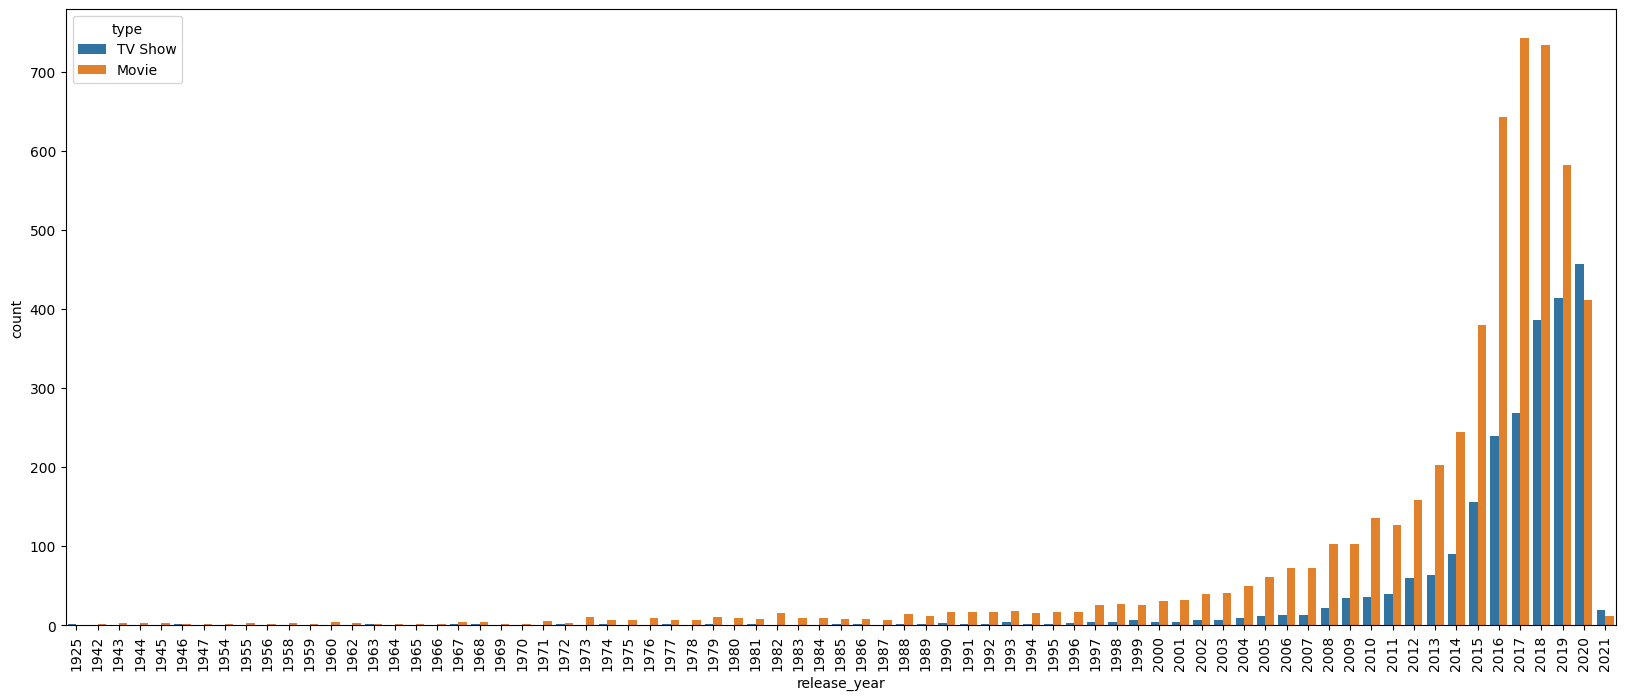

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='release_year',hue='type')
plt.xticks(rotation=90)

**Conclusion:**


*   **No of movies releases increases along with the year till 2017, from 2018 there is downfall in movies.**
*   **On otherhand there is no downfall in TV shows.**
*   **Till 2019 TV shows is always behind the no of movies. In year 2020 and 2021 this trends breaks. No of TV shows increases as compared to movies.**






##6. Listed In VS Country:

In [ ]:
def function_2(func_2_df,column_func2):
  non_null_country = func_2_df[func_2_df['country'] != 'unknown']

  non_null_country['country'] = non_null_country['country'].apply(lambda z: [s.strip() for s in z.split(',')])
  country_list = non_null_country['country'].tolist()
  list_1 = [j.strip() for i in country_list for j in i]
  unique_list_country = list(set(list_1))
  unique_list_country = unique_list_country[1:]

  non_null_country[column_func2] = non_null_country[column_func2].apply(lambda x: [s.strip() for s in x.split(',')])
  column_list = non_null_country[column_func2].tolist()
  list_2 = [j.strip() for i in column_list for j in i]
  unique_list_column = list(set(list_2))

  empty_dict = {}
  empty_dict['country'] = unique_list_country
  for i in unique_list_column:
      empty_dict[i] = []
  for dict_country in empty_dict['country']:
      df_1 = non_null_country[non_null_country['country'].apply(lambda a: dict_country in a)]
      list_3 = df_1[column_func2].to_list()
      main_list_1 = [b for a in list_3 for b in a]
      for i in unique_list_column:
          if i in main_list_1:
              empty_dict[i].append(main_list_1.count(i))
          else:
              empty_dict[i].append(0)
  return empty_dict

In [ ]:
# Creating dataframe for Movies:
country_df2_movie = pd.DataFrame(function_2(df[df['type']=='Movie'],'listed_in'))

In [ ]:
country_df2_movie.head()

country  Documentaries  Sports Movies  International Movies  \
0                       2              0                     3   
1  Denmark              9              1                    21   
2  Ukraine              1              0                     1   
3    Ghana              0              0                     4   
4  Iceland              0              0                     2   

   Romantic Movies  Classic Movies  Horror Movies  Sci-Fi & Fantasy  \
0                0               1              0                 0   
1                1               0              0                 0   
2                0               0              0                 0   
3                0               0              0                 0   
4                1               0              1                 1   

   Music & Musicals  Cult Movies  ...  Thrillers  Action & Adventure  \
0                 0            0  ...          0                   0   
1                 0            1  ...          5                   3   
2                 0            0  ...          0                   0   
3                 0            0  ...          0                   0   
4                 0            0  ...          1                   1   

   Stand-Up Comedy  Movies  Faith & Spirituality  Dramas  Independent Movies  \
0                0       0                     0       2                   0   
1                0       0                     0      15                   7   
2                0       0                     0       0                   0   
3                0       0                     0       4                   1   
4                1       0                     0       5                   3   

   Children & Family Movies  Comedies  LGBTQ Movies  
0                         0         0             0  
1                         3         1             1  
2                         0         0             0  
3                         0         2             0  
4                         0         0             0  

[5 rows x 21 columns]

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109],
 [Text(0, 0, ''),
  Text(1, 0, 'Denmark'),
  Text(2, 0, 'Ukraine'),
  Text(3, 0, 'Ghana'),
  Text(4, 0, 'Iceland'),
  Text(5, 0, 'Serbia'),
  Text(6, 0, 'West Germany'),
  Text(7, 0, 'Croatia'),
  Text(8, 0, 'Jamaica'),
  Text(9, 0, 'Namibia'),
  Text(10, 0, 'Bahamas'),
  Text(11, 0, 'Czech Republic'),
  Text(12, 0, 'Egypt'),
  Text(13, 

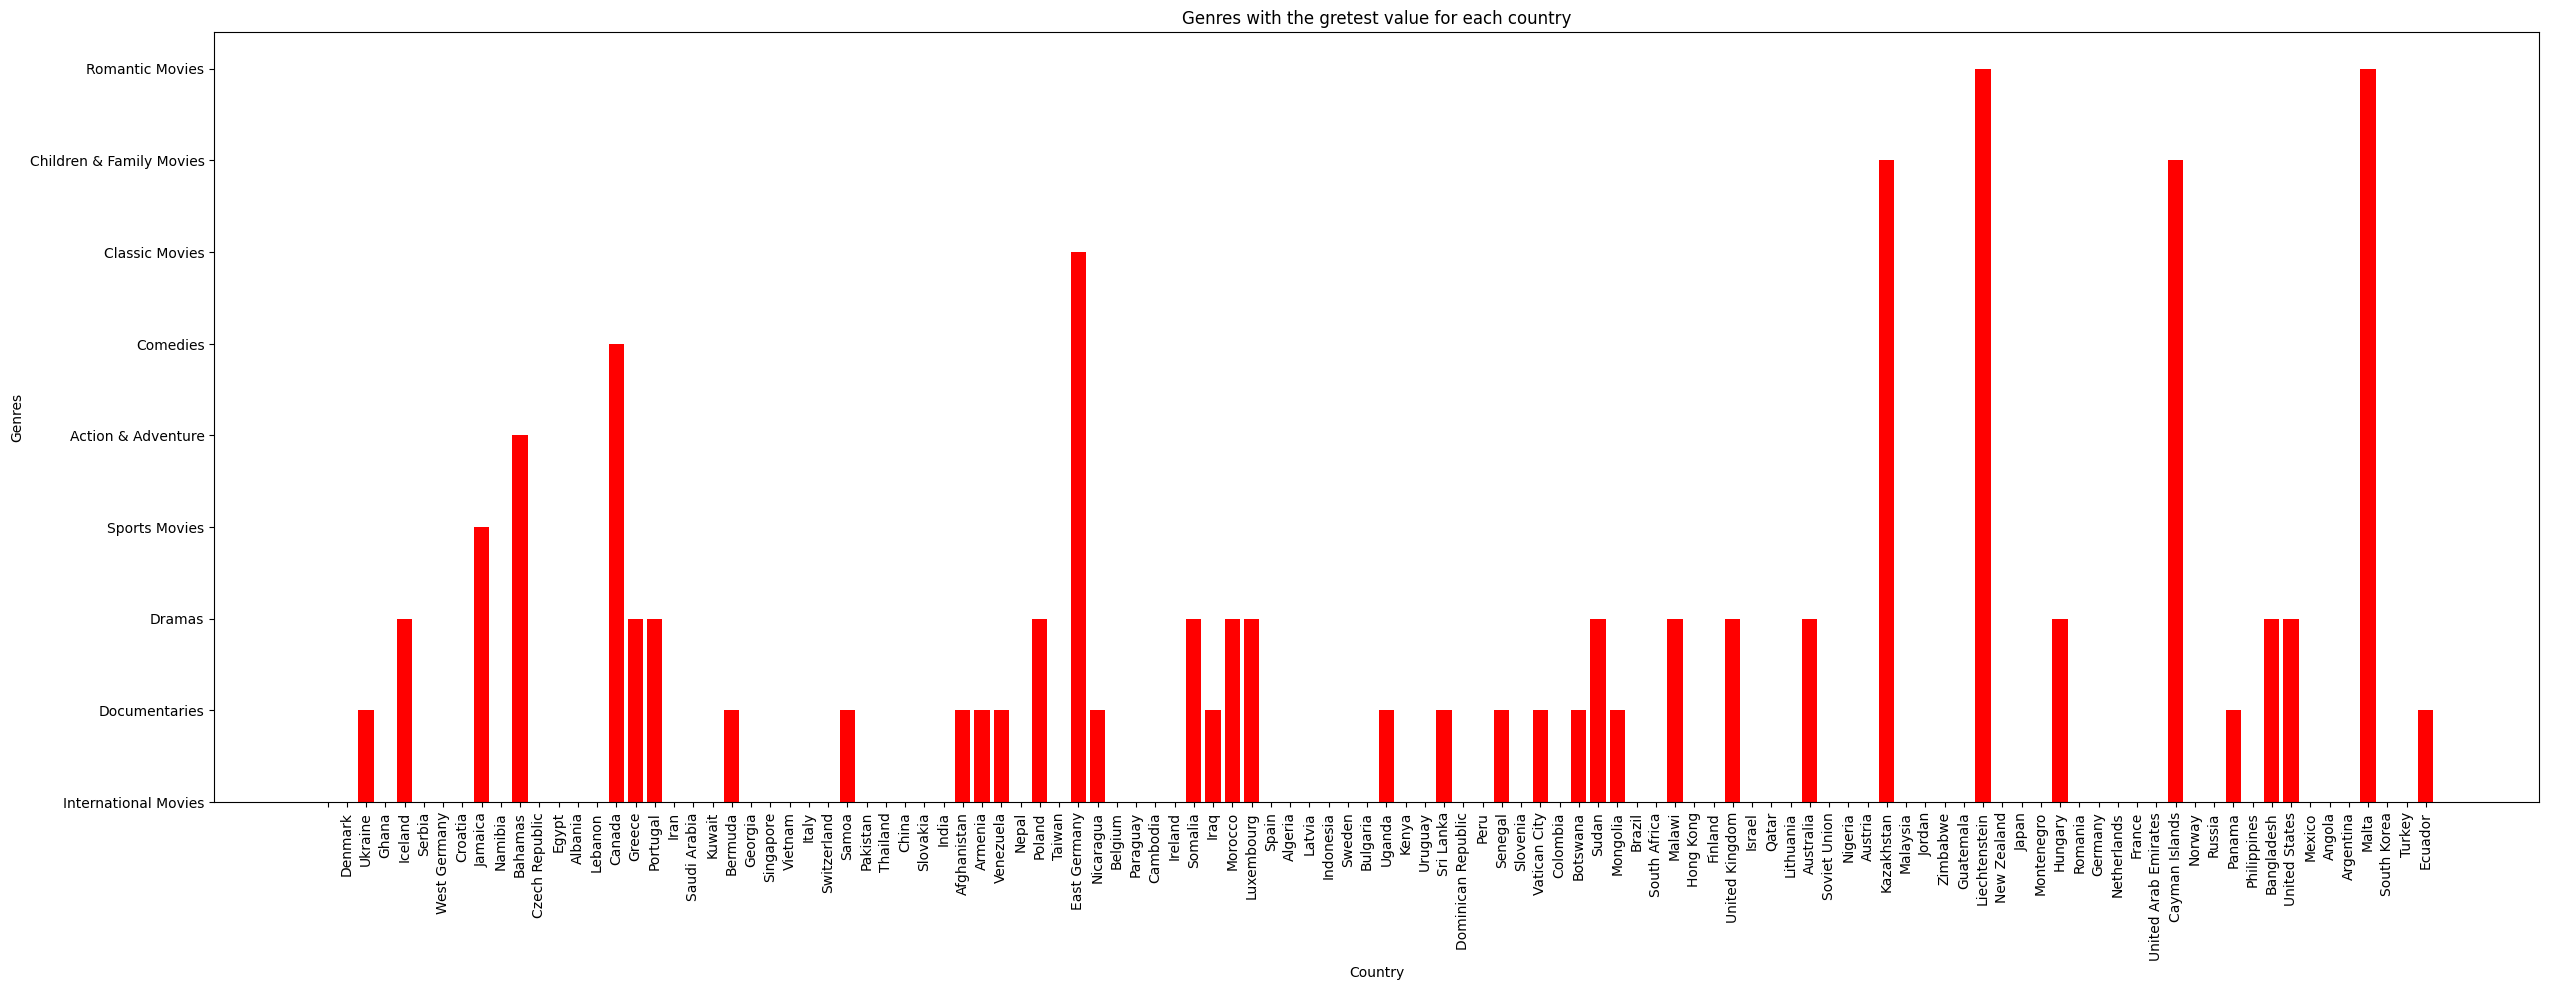

In [ ]:
# set the 'country' column as the index
country_df2_movie.set_index('country', inplace=True)

# get the index of the maximum value for each country
max_genre = country_df2_movie.idxmax(axis=1)

# create a bar plot
plt.figure(figsize=(30,10))
plt.bar(max_genre.index, max_genre.values,color='r')

# set the plot title and axis labels
plt.title("Genres with the gretest value for each country")
plt.xlabel("Country")
plt.ylabel("Genres")
plt.xticks(rotation=90)





 **Majority of Countries has International movies as Genres.Followed by Drama.**



In [ ]:
# Creating DataFrame for TV shows:
country_df2_tv = pd.DataFrame(function_2(df[df['type']=='TV Show'],'listed_in'))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63],
 [Text(0, 0, 'Malaysia'),
  Text(1, 0, 'Jordan'),
  Text(2, 0, 'Denmark'),
  Text(3, 0, 'Ukraine'),
  Text(4, 0, 'Sweden'),
  Text(5, 0, 'Iceland'),
  Text(6, 0, 'New Zealand'),
  Text(7, 0, 'Poland'),
  Text(8, 0, 'Taiwan'),
  Text(9, 0, 'Cyprus'),
  Text(10, 0, 'Japan'),
  Text(11, 0, 'West Germany'),
  Text(12, 0, 'Croatia'),
  Text(13, 0, 'Hungary'),
  Text(14, 0, 'Syria'),
  Text(15, 0, 'Czech Republic'),
  Text(16, 0, 'Germany'),
  Text(17, 0, 'Egypt'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Belgium'),
  Text(20, 0, 'France'),
  Text(21, 0, 'Lebanon'),
  Text(22, 0, 'Uruguay'),
  Text(23, 0, 'United Arab E

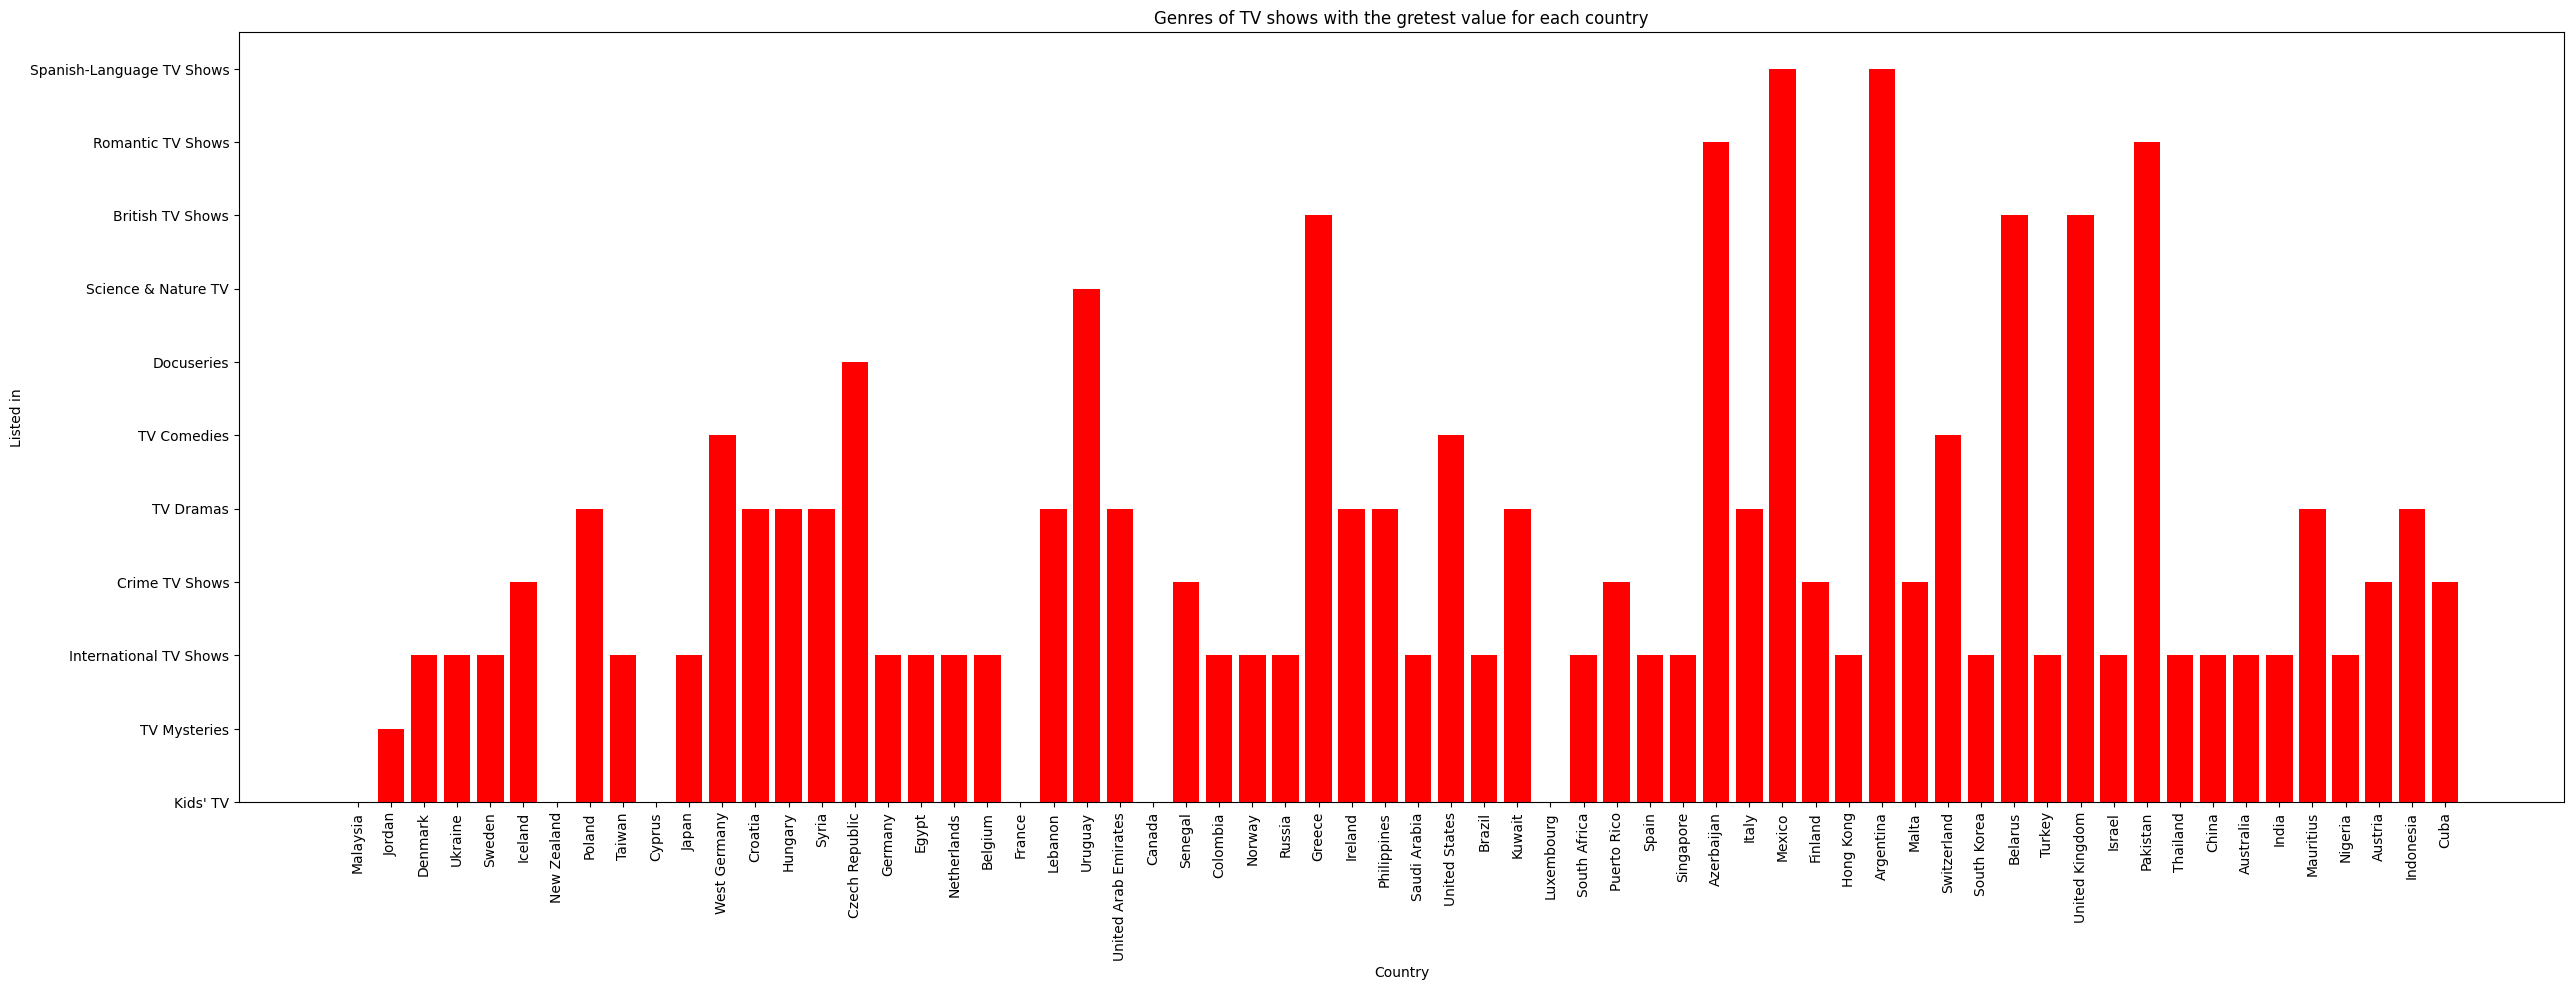

In [ ]:
# set the 'country' column as the index
country_df2_tv.set_index('country', inplace=True)

# get the index of the maximum value for each country
max_genre = country_df2_tv.idxmax(axis=1)

# create a bar plot
plt.figure(figsize=(30,10))
plt.bar(max_genre.index, max_genre.values,color='r')

# set the plot title and axis labels
plt.title("Genres of TV shows with the gretest value for each country")
plt.xlabel("Country")
plt.ylabel("Listed in")
plt.xticks(rotation=90)

**Majority of TV shows are listed as International TV Shows.**

**Now we are plotting the Bar plot showing which Genres is trending in which country.**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Documentaries'),
  Text(1, 0, 'Sports Movies'),
  Text(2, 0, 'International Movies'),
  Text(3, 0, 'Romantic Movies'),
  Text(4, 0, 'Classic Movies'),
  Text(5, 0, 'Horror Movies'),
  Text(6, 0, 'Sci-Fi & Fantasy'),
  Text(7, 0, 'Music & Musicals'),
  Text(8, 0, 'Cult Movies'),
  Text(9, 0, 'Anime Features'),
  Text(10, 0, 'Thrillers'),
  Text(11, 0, 'Action & Adventure'),
  Text(12, 0, 'Stand-Up Comedy'),
  Text(13, 0, 'Movies'),
  Text(14, 0, 'Faith & Spirituality'),
  Text(15, 0, 'Dramas'),
  Text(16, 0, 'Independent Movies'),
  Text(17, 0, 'Children & Family Movies'),
  Text(18, 0, 'Comedies'),
  Text(19, 0, 'LGBTQ Movies')])

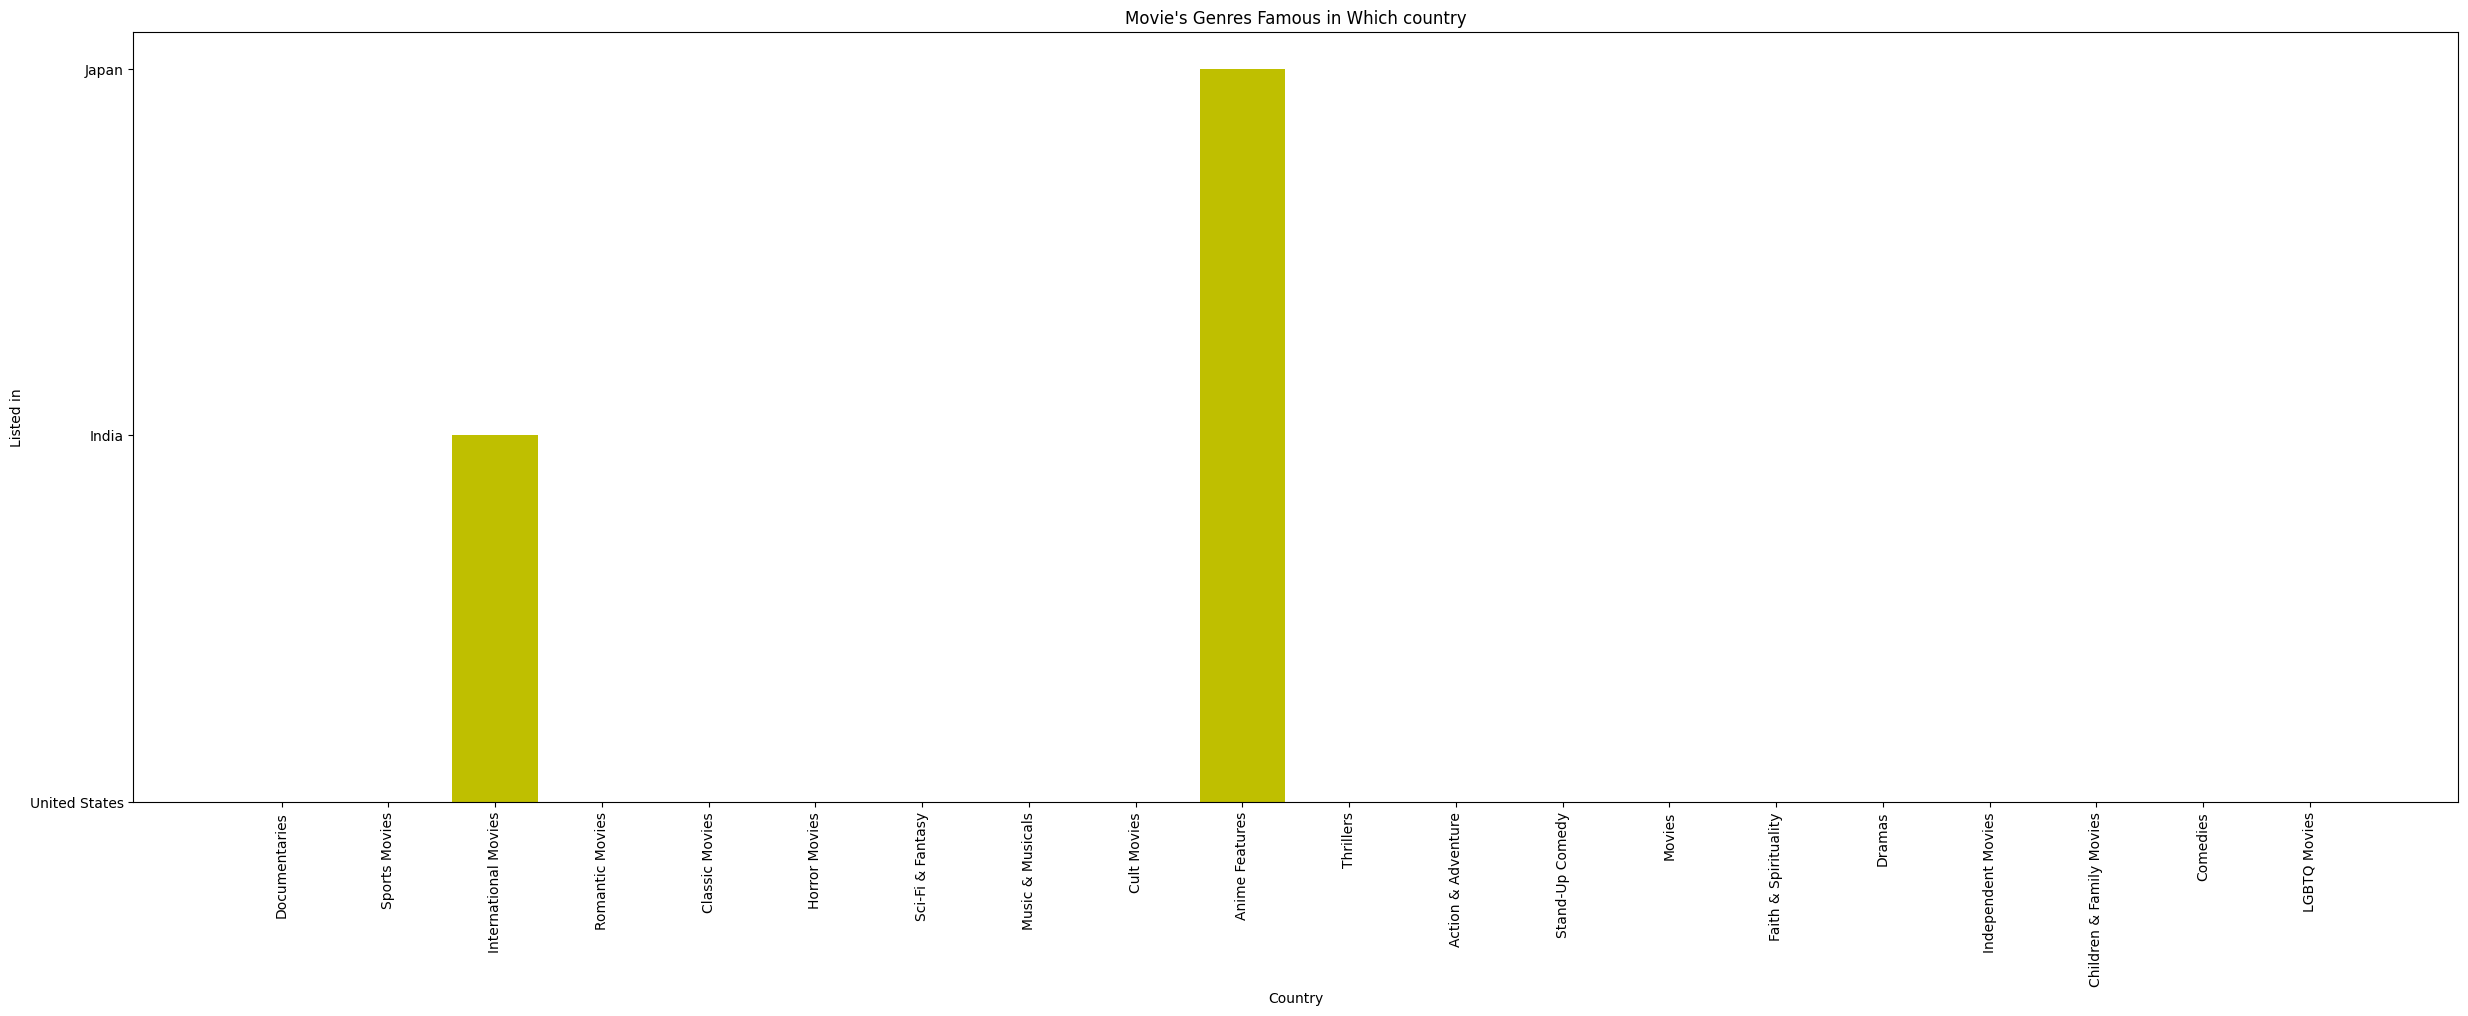

In [ ]:
# set the 'country' column as the index
#country_df2_movie.set_index('country', inplace=True)

# get the index of the maximum value for each country
max_genre = country_df2_movie.idxmax(axis=0)

# create a bar plot
plt.figure(figsize=(30,10))
plt.bar(max_genre.index, max_genre.values,color='y')

# set the plot title and axis labels
plt.title("Movie's Genres Famous in Which country")
plt.xlabel("Country")
plt.ylabel("Listed in")
plt.xticks(rotation=90)

**Conclusion:**

*   **India is Famous International Movies.**
*   **Japan is Famous for its Anime Movies.**
*   **United states is the top Country among the rest Genres**





([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'TV Horror'),
  Text(1, 0, 'British TV Shows'),
  Text(2, 0, 'Crime TV Shows'),
  Text(3, 0, 'TV Thrillers'),
  Text(4, 0, 'Science & Nature TV'),
  Text(5, 0, 'Classic & Cult TV'),
  Text(6, 0, 'Teen TV Shows'),
  Text(7, 0, "Kids' TV"),
  Text(8, 0, 'TV Mysteries'),
  Text(9, 0, 'Docuseries'),
  Text(10, 0, 'TV Comedies'),
  Text(11, 0, 'Stand-Up Comedy & Talk Shows'),
  Text(12, 0, 'TV Action & Adventure'),
  Text(13, 0, 'Romantic TV Shows'),
  Text(14, 0, 'Reality TV'),
  Text(15, 0, 'Spanish-Language TV Shows'),
  Text(16, 0, 'TV Shows'),
  Text(17, 0, 'TV Dramas'),
  Text(18, 0, 'International TV Shows'),
  Text(19, 0, 'Anime Series'),
  Text(20, 0, 'Korean TV Shows'),
  Text(21, 0, 'TV Sci-Fi & Fantasy')])

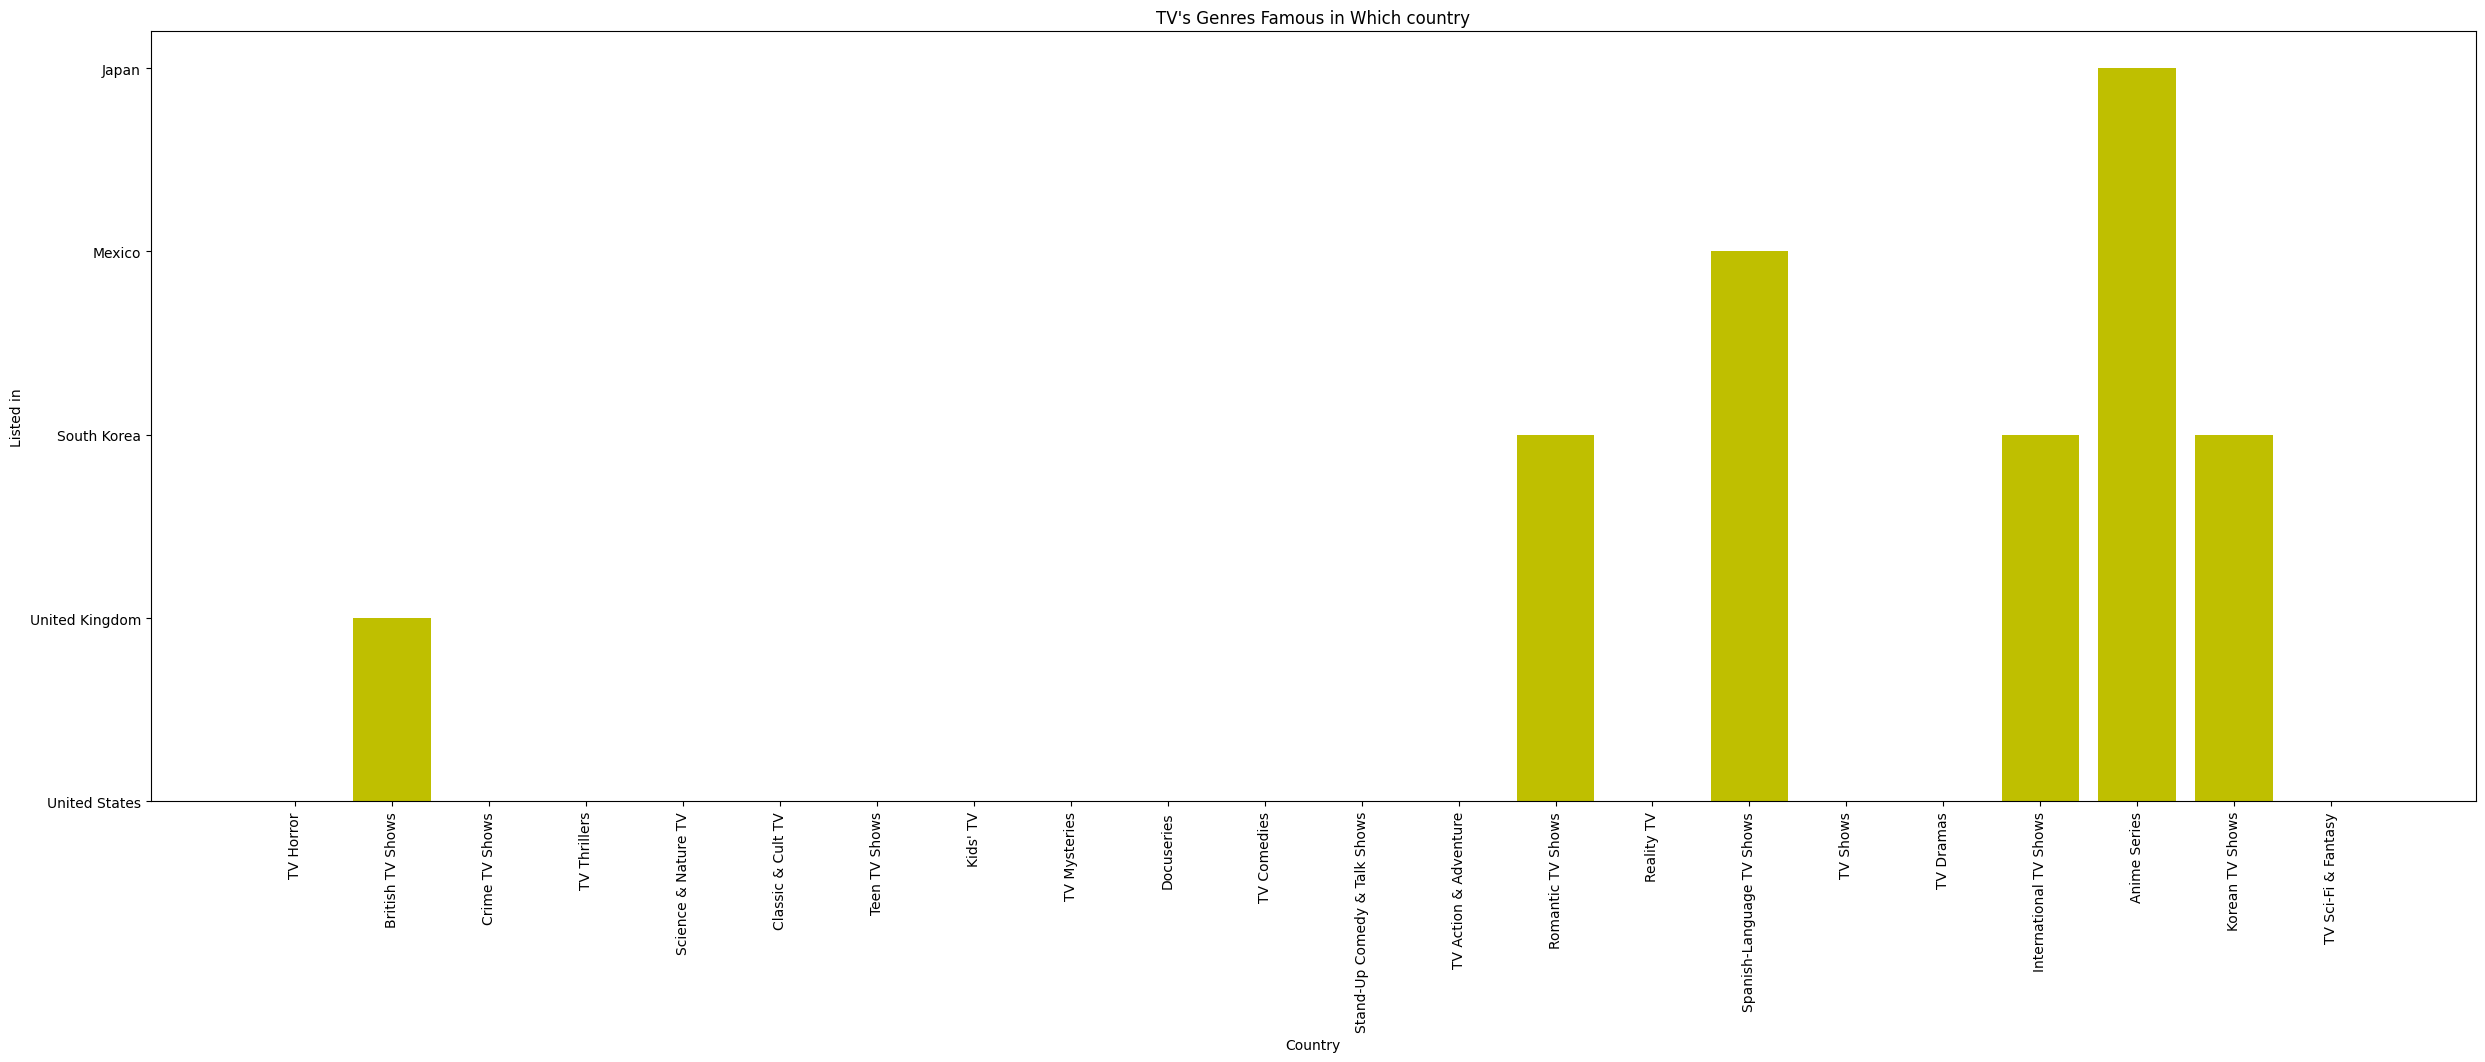

In [ ]:
# set the 'country' column as the index
#country_df2_tv.set_index('country', inplace=True)

# get the index of the maximum value for each country
max_genre = country_df2_tv.idxmax(axis=0)

# create a bar plot
plt.figure(figsize=(30,10))
plt.bar(max_genre.index, max_genre.values,color='y')

# set the plot title and axis labels
plt.title("TV's Genres Famous in Which country")
plt.xlabel("Country")
plt.ylabel("Listed in")
plt.xticks(rotation=90)

**Conclusion:**


*   **Japan is famous for Anime and Teen TV shows like cartoons.**
*   **India is famous for TV shows.**
*   **No Mention of United States in TV shows.**





## 7. Rating VS Country:

In [ ]:
# Creating the dataframe for rating and country:
country_df3 = pd.DataFrame(function_2(df,'rating'))

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116],
 [Text(0, 0, ''),
  Text(1, 0, 'Denmark'),
  Text(2, 0, 'Ukraine'),
  Text(3, 0, 'Ghana'),
  Text(4, 0, 'Iceland'),
  Text(5, 0, 'Serbia'),
  Text(6, 0, 'West Germany'),
  Text(7, 0, 'Croatia'),
  Text(8, 0, 'Jamaica'),
  Text(9, 0, 'Namibia'),
  Text(10, 0, 'Bahamas'),
  Text(11, 0, 'Czec

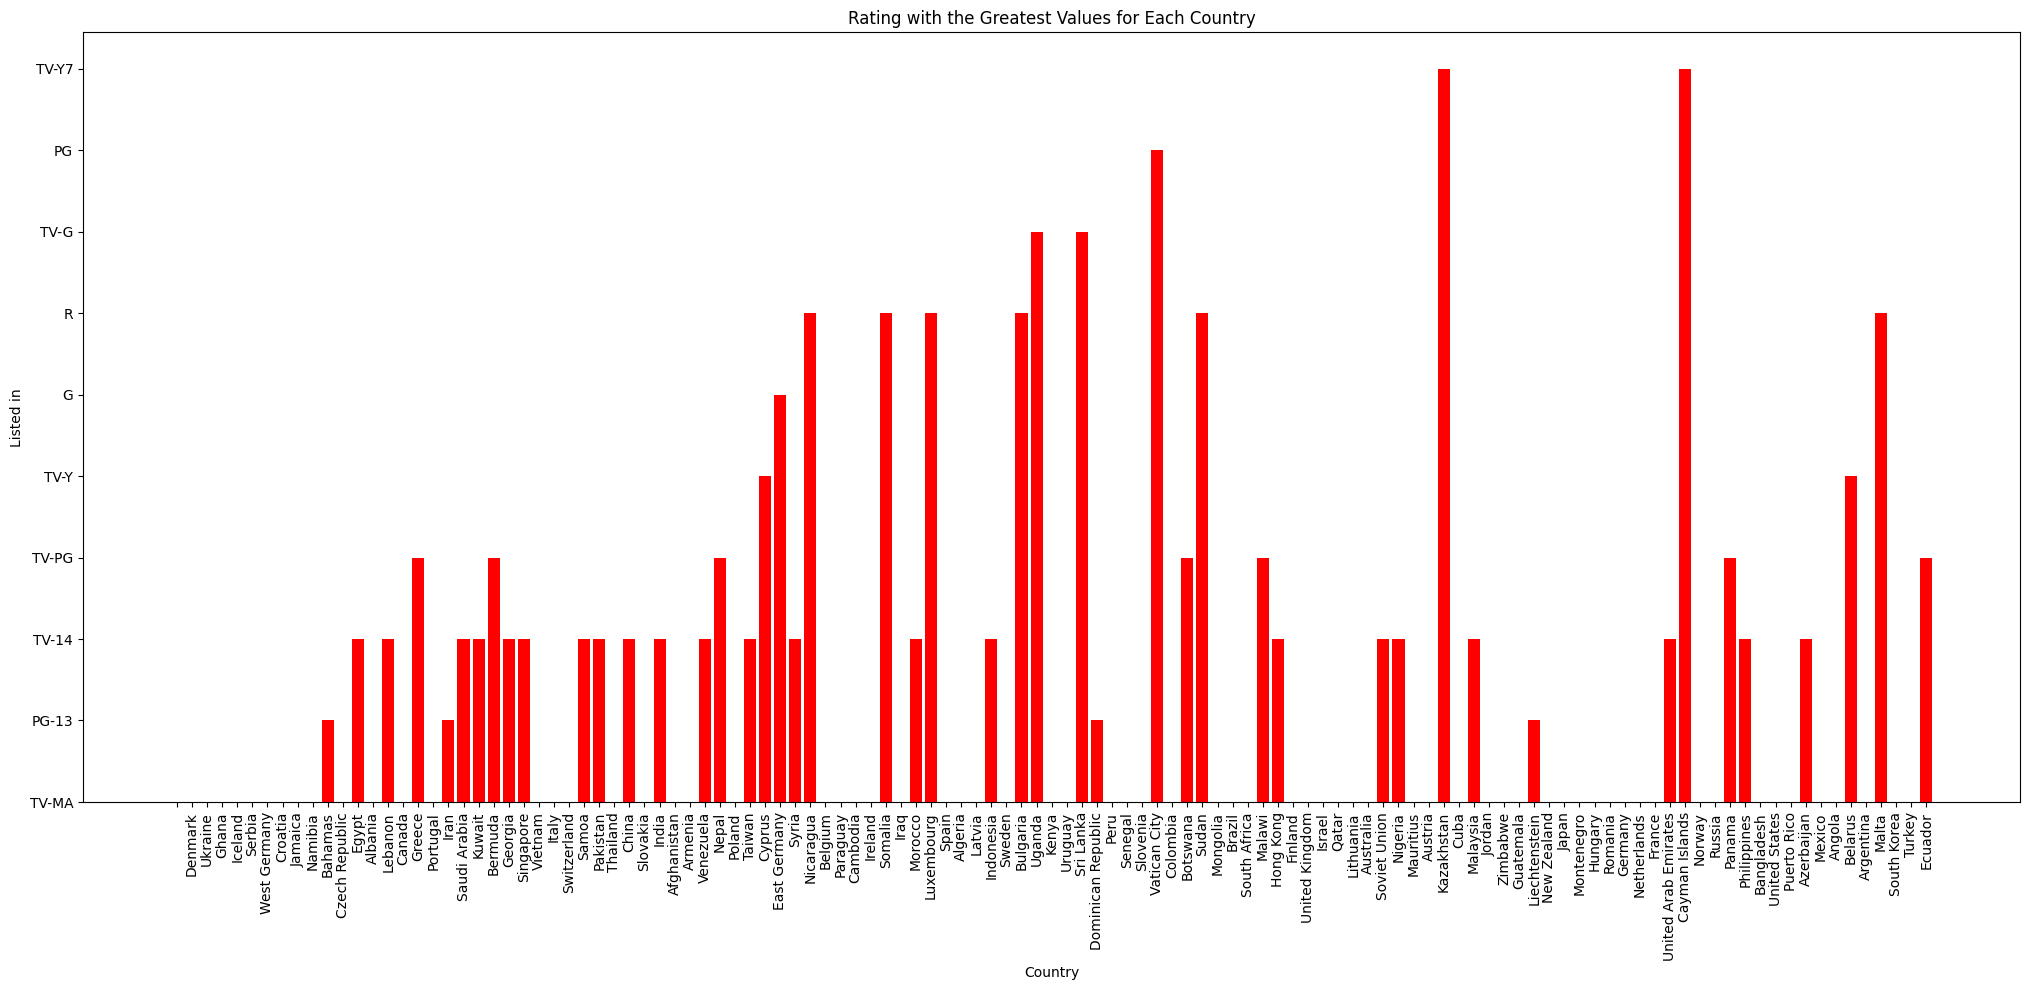

In [ ]:
# set the 'country' column as the index
country_df3.set_index('country', inplace=True)

# get the index of the maximum value for each country
max_genre = country_df3.idxmax(axis=1)

# create a bar plot
plt.figure(figsize=(25,10))
plt.bar(max_genre.index, max_genre.values,color='r')

# set the plot title and axis labels
plt.title("Rating with the Greatest Values for Each Country")
plt.xlabel("Country")
plt.ylabel("Listed in")
plt.xticks(rotation=90)

**Majority of content are rated as TV-MA**

## 8. Year of release VS Country:

In [ ]:
df['release_year'] = df['release_year'].apply(lambda z: str(z))

In [ ]:
year_country_df = pd.DataFrame(function_2(df,'release_year'))

In [ ]:
year_dict = {}
for year in range(1925, 2022):
    # Add the year as a string to the dictionary with its integer value as the value
    year_dict[str(year)] = int(year)

year_country_df.rename(columns=year_dict, inplace=True)

In [ ]:
top_ten_country = year_country_df[year_country_df['country'].apply(lambda z: z  in ['United States','India','United Kingdom','Canada','France','Japan','Spain','South Korea','Germany','Mexico'])]

In [ ]:
top_ten_country.set_index('country', inplace=True)

In [ ]:
top_ten_country = top_ten_country.sort_index(axis=1)

In [ ]:
top_ten_country

1942  1943  1944  1945  1946  1947  1954  1955  1956  1958  \
country                                                                      
Canada             0     0     0     0     0     0     0     0     0     0   
India              0     0     0     0     0     0     0     0     0     0   
Spain              0     0     0     0     0     0     0     0     0     0   
United Kingdom     0     0     1     0     0     0     0     0     0     0   
Japan              0     0     0     0     0     0     0     0     0     0   
Germany            0     0     0     0     0     0     0     0     0     0   
France             0     0     0     0     0     0     0     1     0     0   
United States      2     3     3     3     2     1     1     1     1     2   
Mexico             0     0     0     0     0     0     0     0     0     0   
South Korea        0     0     0     0     0     0     0     0     0     0   

                ...  2012  2013  2014  2015  2016  2017  2018  2019  2020  \
country         ...                                                         
Canada          ...    14     8    28    31    54    57    64    43    41   
India           ...    39    56    56    70    79   111   102    90    68   
Spain           ...     2     7     2    16    33    34    45    33    30   
United Kingdom  ...    22    26    43    63    98   101    90    59    68   
Japan           ...     6    11    16    15    22    35    49    38    22   
Germany         ...     6     6    11    14    30    22    13    14    32   
France          ...     7    14    21    34    51    39    46    43    26   
United States   ...    89   103   123   197   332   436   441   427   377   
Mexico          ...     3     2     4     8    22    20    27    25    21   
South Korea     ...    11     6     9    16    35    33    34    26    32   

                2021  
country               
Canada             2  
India              1  
Spain              1  
United Kingdom     2  
Japan              0  
Germany            0  
France             0  
United States     16  
Mexico             2  
South Korea        1  

[10 rows x 72 columns]

Text(0, 0.5, 'Count of movies')

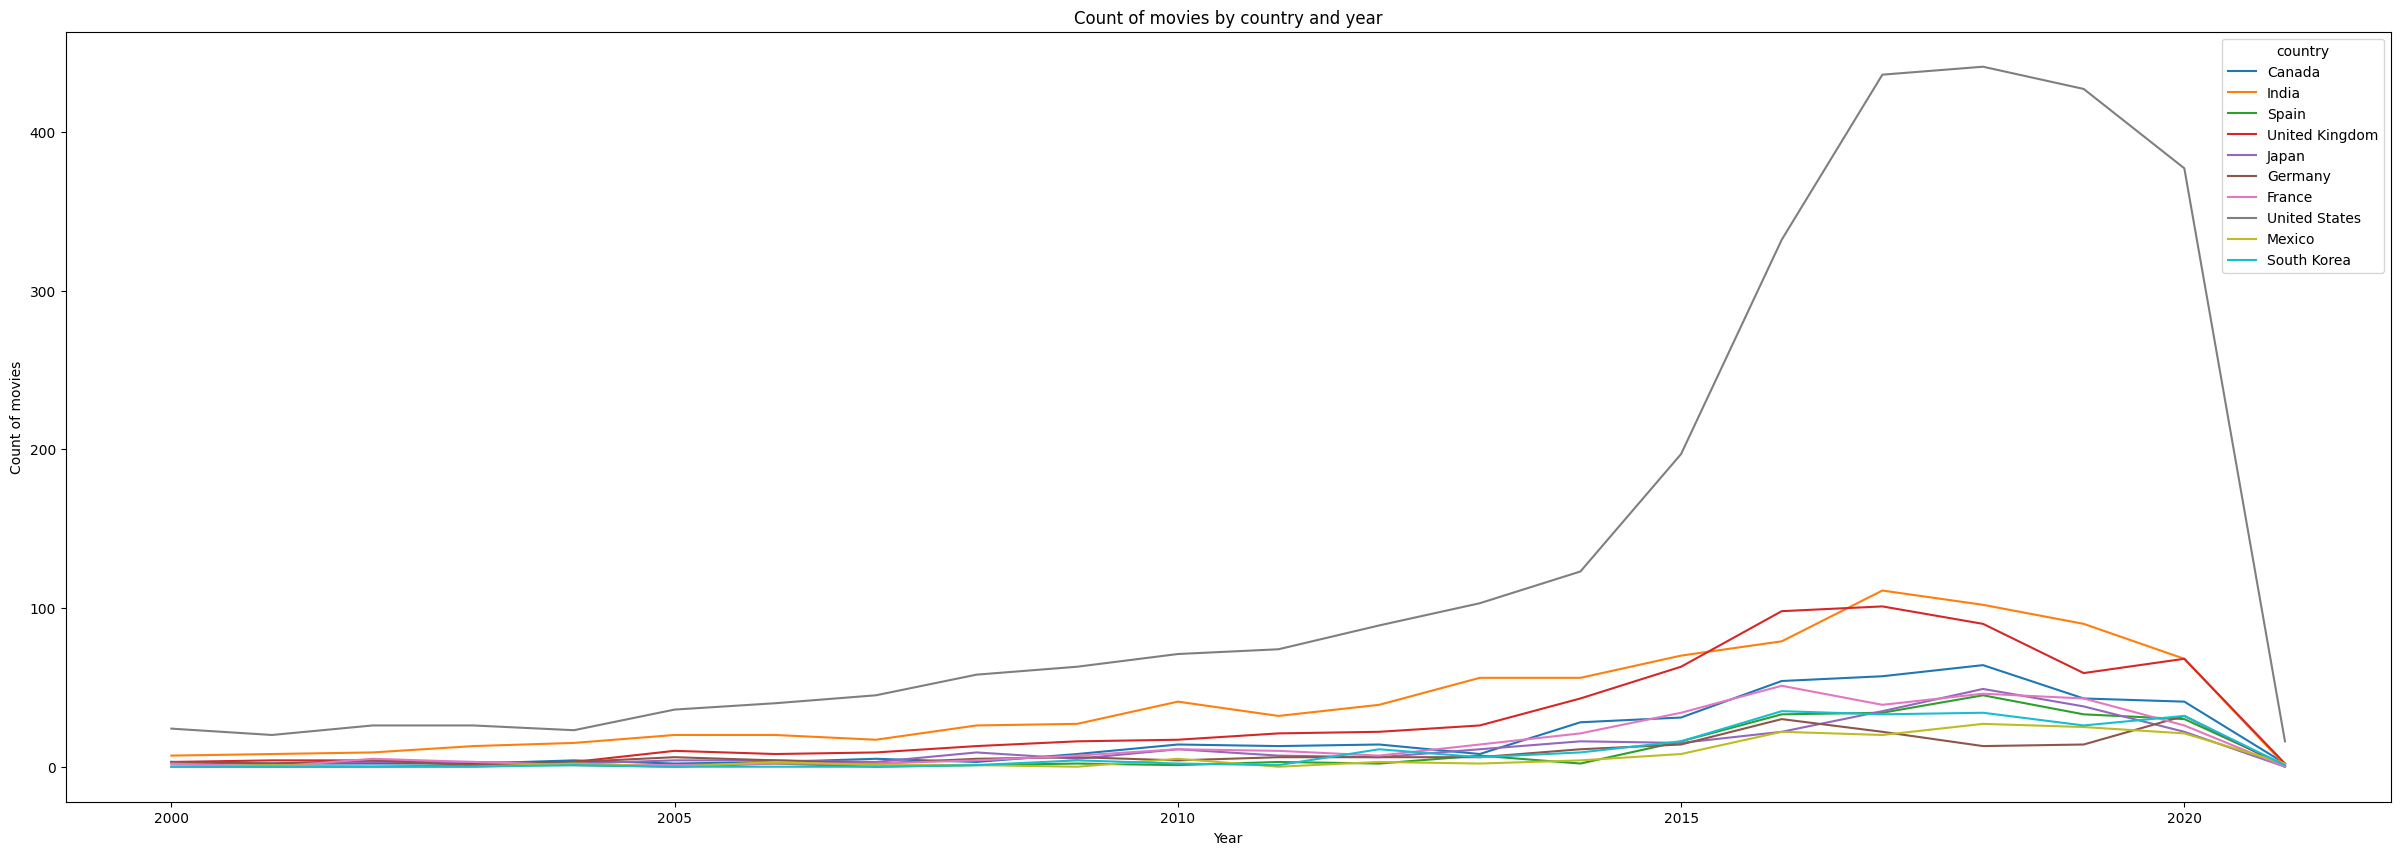

In [ ]:
# Plot a line chart for each country
top_ten_country.iloc[:,50:].T.plot(kind='line', figsize=(30, 10))

# Set the title and axis labels
plt.title('Count of movies by country and year')
plt.xlabel('Year')
plt.ylabel('Count of movies')



*   **As clearly Seen trend for United states rises sharply from year 2014 and drop after 2017.**
*   **Trend for India and UK are same.**
*   **Trend for canada and France are Same.**





## 9. Year of release VS Average Duration:

In [ ]:
movie_df.head()

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   
4      s5  Movie     21     Robert Luketic   
6      s7  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

  date_added  release_year rating  duration  \
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   
6 2020-06-01          2019  TV-MA        95   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
6                Horror Movies, International Movies   

                                         description  year     month  \
1  After a devastating earthquake hits Mexico Cit...  2016  December   
2  When an army recruit is found dead, his fellow...  2018  December   
3  In a postapocalyptic world, rag-doll robots hi...  2017  November   
4  A brilliant group of students become card-coun...  2020   January   
6  After an awful accident, a couple admitted to ...  2020      June   

        week                                     listed_in_list  
1     Friday                    [Dramas,  International Movies]  
2   Thursday             [Horror Movies,  International Movies]  
3   Thursday  [Action & Adventure,  Independent Movies,  Sci...  
4  Wednesday                                           [Dramas]  
6     Monday             [Horror Movies,  International Movies]

<Axes: xlabel='release_year'>

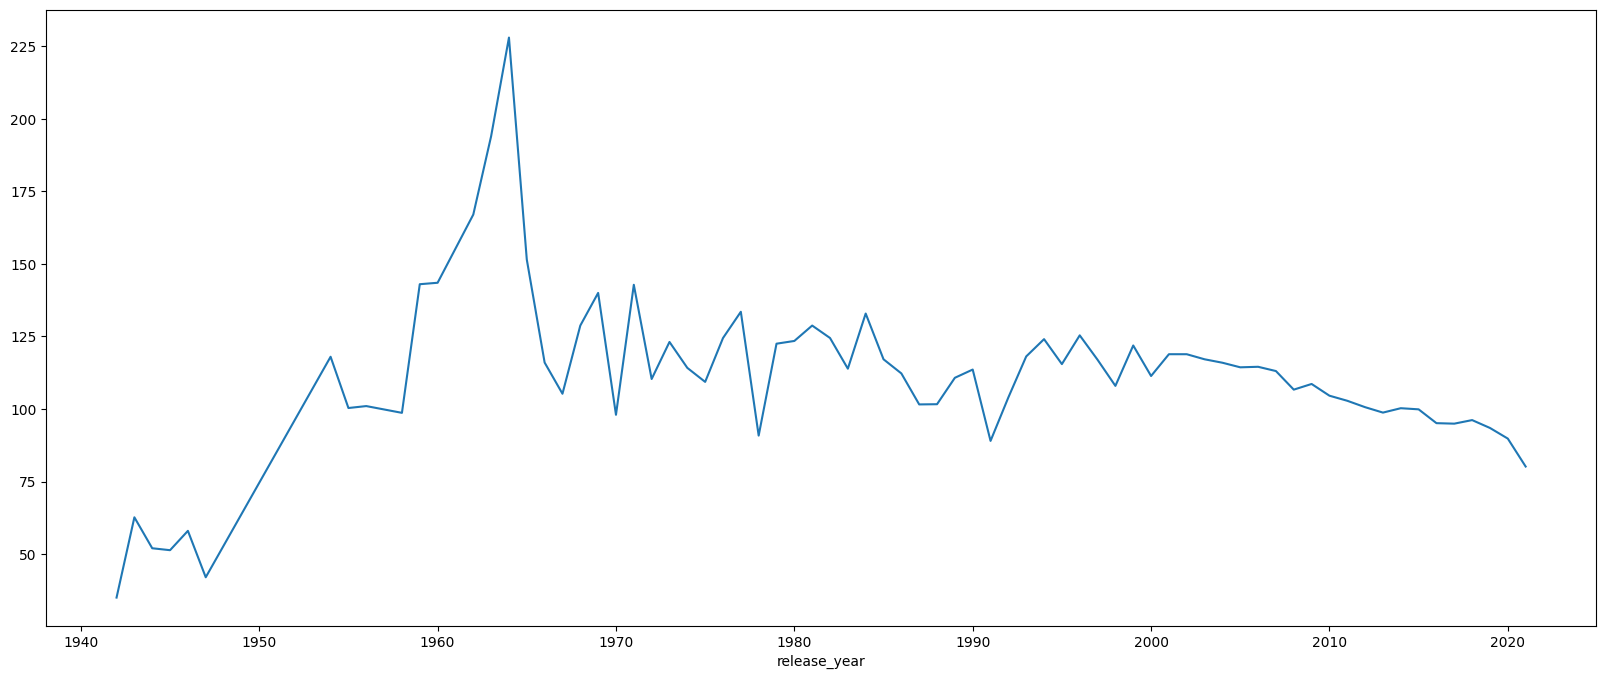

In [ ]:
movie_df.groupby('release_year')['duration'].mean().plot(kind='line',figsize=(20,8))

## 10. country VS Average Duration:

In [ ]:
movie_df.head()

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   
4      s5  Movie     21     Robert Luketic   
6      s7  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

  date_added  release_year rating  duration  \
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   
6 2020-06-01          2019  TV-MA        95   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
6                Horror Movies, International Movies   

                                         description  year     month  \
1  After a devastating earthquake hits Mexico Cit...  2016  December   
2  When an army recruit is found dead, his fellow...  2018  December   
3  In a postapocalyptic world, rag-doll robots hi...  2017  November   
4  A brilliant group of students become card-coun...  2020   January   
6  After an awful accident, a couple admitted to ...  2020      June   

        week                                     listed_in_list  
1     Friday                    [Dramas,  International Movies]  
2   Thursday             [Horror Movies,  International Movies]  
3   Thursday  [Action & Adventure,  Independent Movies,  Sci...  
4  Wednesday                                           [Dramas]  
6     Monday             [Horror Movies,  International Movies]

In [ ]:
# Creating a Empty dict:
country_duration_dict={}
# Converting the country column into list by split command:
movie_df['country'] = movie_df['country'].apply(lambda z:[i.strip() for i in z.split(',')])

In [ ]:
# Appending the dictionary by appending country as key and average duration as value:
for i in unique_country_list[1:]:
  country_duration_df = movie_df[movie_df['country'].apply(lambda c: i in c)]
  country_duration_dict[i] = country_duration_df['duration'].mean()
  country_duration_dict = {k: v for k, v in country_duration_dict.items() if not pd.isna(v)}

In [ ]:
# Creating the Dataframe:
country_duration_df = pd.DataFrame({'country':country_duration_dict.keys(),'Average Duration':country_duration_dict.values()})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109]),
 [Text(0, 0, ''),
  Text(1, 0, 'Denmark'),
  Text(2, 0, 'Ukraine'),
  Text(3, 0, 'Ghana'),
  Text(4, 0, 'Iceland'),
  Text(5, 0, 'Serbia'),
  Text(6, 0, 'West Germany'),
  Text(7, 0, 'Croatia'),
  Text(8, 0, 'Jamaica'),
  Text(9, 0, 'Namibia'),
  Text(10, 0, 'Bahamas'),
  Text(11, 0, 'Czech Republic'),
  Text(12, 0, 'Egypt'),
  Text(13, 0, 'Albania'),
  Text(14, 0, 'Lebanon

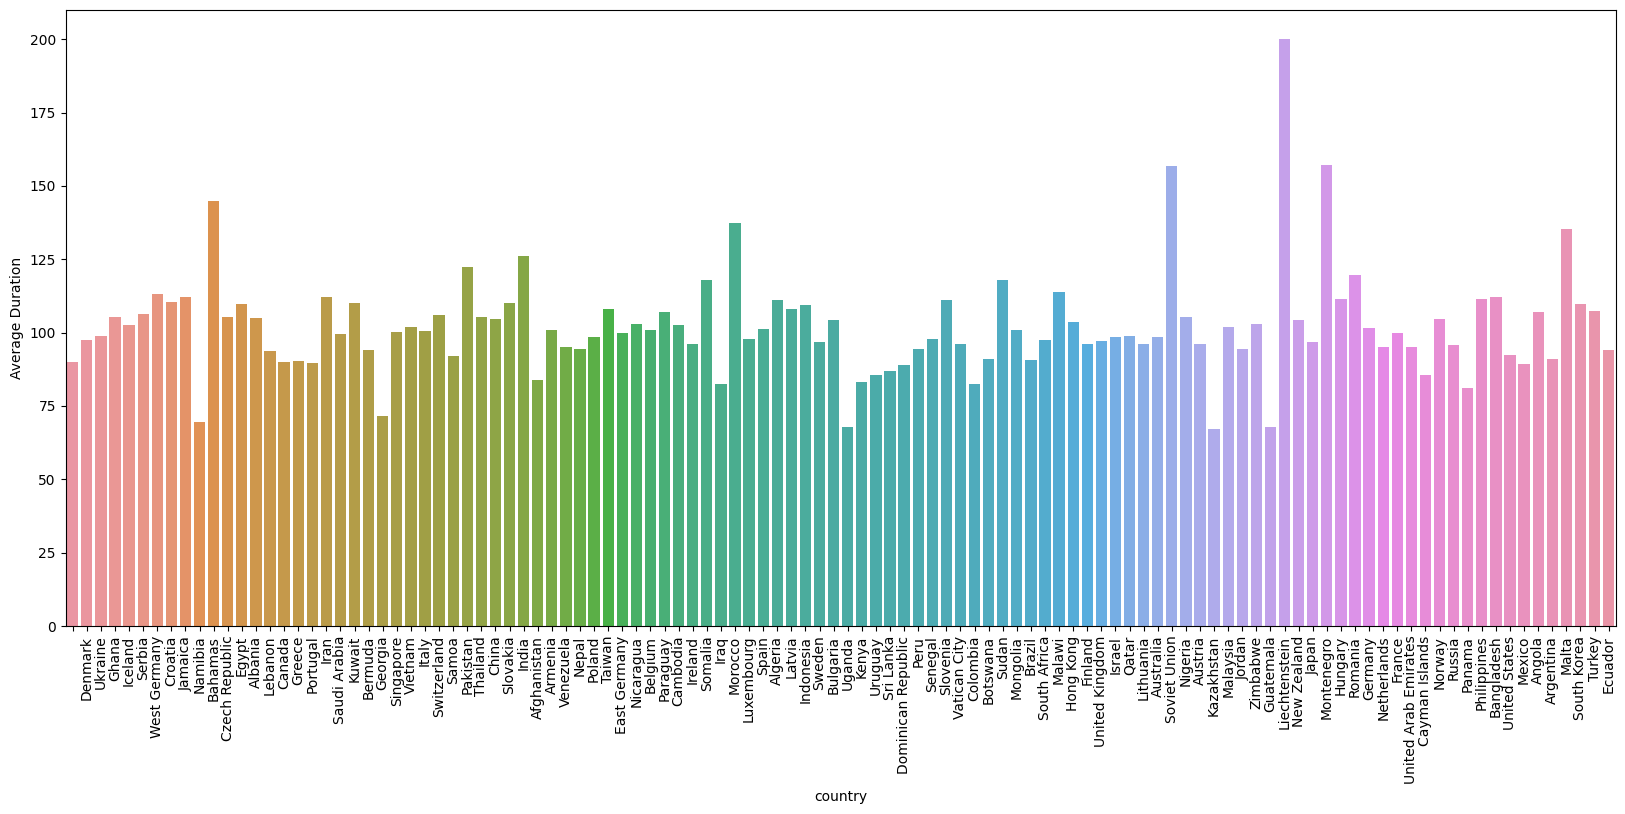

In [ ]:
# Plotting the barplot:
plt.figure(figsize=(20,8))
sns.barplot(data=country_duration_df,x='country',y='Average Duration')
plt.xticks(rotation=90)

**It appears that the average duration of movies varies widely across different countries. The country with the longest average movie duration is Liechtenstein with 200 minutes, followed by Montenegro with 157 minutes and Morocco with 137.33 minutes. On the other hand, the country with the shortest average movie duration is Guatemala with only 68 minutes, followed by Uganda and Namibia with 68 and 69.5 minutes respectively.**

**Some of the countries with high average movie durations include East Germany, Soviet Union, and West Germany, which are no longer in existence. This could be due to the fact that the data includes movies that were produced during the time when these countries were still in existence.**

**It is also interesting to note that the United States, which is one of the largest movie producers in the world, has an average movie duration of only 92.38 minutes, which is lower than the overall average of 100.86 minutes for all countries combined.**

#**Data Preprocessing:**

In [ ]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added release_year rating   duration  \
0 2020-08-14         2020  TV-MA  4 Seasons   
1 2016-12-23         2016  TV-MA     93 min   
2 2018-12-20         2011      R     78 min   
3 2017-11-16         2009  PG-13     80 min   
4 2020-01-01         2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year     month  \
0  In a future where the elite inhabit an island ...  2020    August   
1  After a devastating earthquake hits Mexico Cit...  2016  December   
2  When an army recruit is found dead, his fellow...  2018  December   
3  In a postapocalyptic world, rag-doll robots hi...  2017  November   
4  A brilliant group of students become card-coun...  2020   January   

        week                                     listed_in_list  
0     Friday  [International TV Shows,  TV Dramas,  TV Sci-F...  
1     Friday                    [Dramas,  International Movies]  
2   Thursday             [Horror Movies,  International Movies]  
3   Thursday  [Action & Adventure,  Independent Movies,  Sci...  
4  Wednesday                                           [Dramas]

In [ ]:
# preparing the data for cluster:
df['cluster'] = df['cast'] + ' ' + df['country'] + ' ' + df['director'] + ' ' + df['rating'] + ' ' + df['listed_in'] 

In [ ]:
df.loc[0,'cluster']

'João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil unknown TV-MA International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [ ]:
# Importing Stop words and strings:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function to remove stopwords and strings:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
# Removing stop words and Strings:
df['cluster'] = df['cluster'].apply(text_process)

In [ ]:
df.loc[0,'cluster']

'João Miguel Bianca Comparato Michel Gomes Rodolfo Valente Vaneza Oliveira Rafael Lozano Viviane Porto Mel Fronckowiak Sergio Mamberti Zezé Motta Celso Frateschi Brazil unknown TVMA International TV Shows TV Dramas TV SciFi Fantasy'

In [ ]:
# Convet all to lowercase:
df['cluster']= df['cluster'].apply(lambda z:z.lower())

In [ ]:
df.loc[0,'cluster']

'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil unknown tvma international tv shows tv dramas tv scifi fantasy'

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Applying Lemitization:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatizer_function(data):
  words = word_tokenize(data)
  # Lemmatize each word
  lemmatized_words = [lemmatizer.lemmatize(i) for i in words]
  return ' '.join(lemmatized_words)

In [ ]:
df['cluster'] = df['cluster'].apply(lemmatizer_function)

In [ ]:
df.loc[0,'cluster']

'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil unknown tvma international tv show tv drama tv scifi fantasy'

In [ ]:
# Creating Variable for TF-IDF Vectorizor & apply fit_transform on cluster:
vectorizer_tv = TfidfVectorizer(max_features = 20000)   
x = vectorizer_tv.fit_transform(df['cluster'])

In [ ]:
x.shape

(7770, 20000)

In [ ]:
type(x)

scipy.sparse._csr.csr_matrix

#**Principal Component Analysis:**

Principal Component Analysis (PCA) is a statistical technique used to reduce the dimensionality of large datasets by transforming the variables into a smaller set of uncorrelated variables called principal components.

PCA is commonly used in data analysis and pattern recognition applications. It is especially useful when dealing with high-dimensional datasets, where the number of variables is large compared to the number of observations.

The basic idea behind PCA is to find a linear combination of the original variables that explains the most variance in the data. This linear combination is called the first principal component. The second principal component is a linear combination of the original variables that explains the most variance in the data, subject to being uncorrelated with the first principal component, and so on.

PCA is a powerful tool for data analysis and visualization. It can be used to identify patterns and relationships in data, to reduce noise and redundancy in data, and to identify the most important variables in a dataset. However, it is important to interpret the results of PCA carefully, as the principal components may not always have a clear physical or biological interpretation.

In [ ]:
# Converting to Array:
dense_matrix = x.toarray()

In [ ]:
# Fitting the PCA:
pca=PCA(random_state=24)
pca.fit(dense_matrix)

PCA(random_state=24)

Text(0.5, 1.0, 'Cumulative Sum of Explained Variance Ratio in PCA')

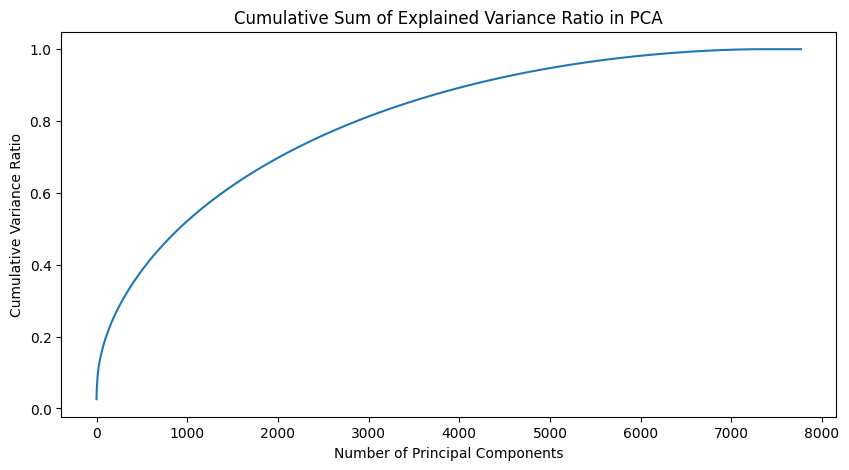

In [ ]:
# Calculate the explained variance ratio
variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative sum of explained variance ratio
cumulative_variance_ratio = np.cumsum(variance_ratio)

# Plot the cumulative sum of explained variance ratio
plt.figure(figsize=(10,5))
plt.plot(cumulative_variance_ratio)

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Sum of Explained Variance Ratio in PCA')

**It is clearly visible at 3000 PCA component, Explainability of variance is about 80 percent. So we are going to transform at 3000 component**

In [ ]:
# Applying Fit transform:
pca = PCA(n_components=3000,random_state=24)
pca_output = pca.fit_transform(dense_matrix)

In [ ]:
print(pca.explained_variance_.sum())

0.7899184897923563


**Variance Explained is about 80 percent.**

In [ ]:
pca_output.shape

(7770, 3000)

#**Applying K Mean Algorithm:**

K-means clustering is a popular unsupervised machine learning algorithm used for grouping similar data points into clusters. The algorithm partitions a given dataset into k clusters based on the similarities between the data points.

The k-means algorithm works by first randomly selecting k initial centroids, where k is the number of clusters. The algorithm then assigns each data point to the nearest centroid, based on the Euclidean distance between the data point and each centroid. The centroids are then updated by computing the mean of all the data points assigned to each cluster. This process is repeated until the centroids no longer change significantly or a maximum number of iterations is reached.

The k-means algorithm is widely used in data science for clustering applications such as customer segmentation, image segmentation, and anomaly detection. However, it has some limitations such as sensitivity to the initial centroids, inability to handle non-linearly separable data, and requiring the number of clusters to be specified beforehand.

Overall, k-means is a powerful and widely used clustering algorithm that can help in identifying natural groupings within a dataset.

In [ ]:
# Creating a list of inertia value for cluster in range of 2 to 20:
inertia = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_output)
    inertia.append(kmeans.inertia_)

#**Elbow Curve Potting:**

The elbow method is a heuristic used in machine learning to determine the optimal number of clusters to use in a k-means clustering algorithm. The method involves plotting the variance explained by each cluster against the number of clusters used, and identifying the "elbow" point where the addition of another cluster no longer significantly reduces the variance explained.

To plot an elbow curve, the k-means algorithm is run multiple times with different values of k (the number of clusters) and the within-cluster sum of squares (WSS) is computed for each value of k. The WSS measures the sum of the squared distances between each data point and its assigned centroid. The WSS is then plotted against the number of clusters, and the elbow point is identified as the point where the rate of decrease in WSS slows down significantly.

The elbow curve is useful in determining the optimal number of clusters to use in a k-means clustering algorithm. By identifying the elbow point, the user can select the number of clusters that optimally balances the trade-off between minimizing the WSS and minimizing the number of clusters. However, it is important to note that the elbow method is a heuristic and the optimal number of clusters may vary depending on the specific dataset and application.

Text(0.5, 1.0, 'Elbow Curve for KMeans Clustering')

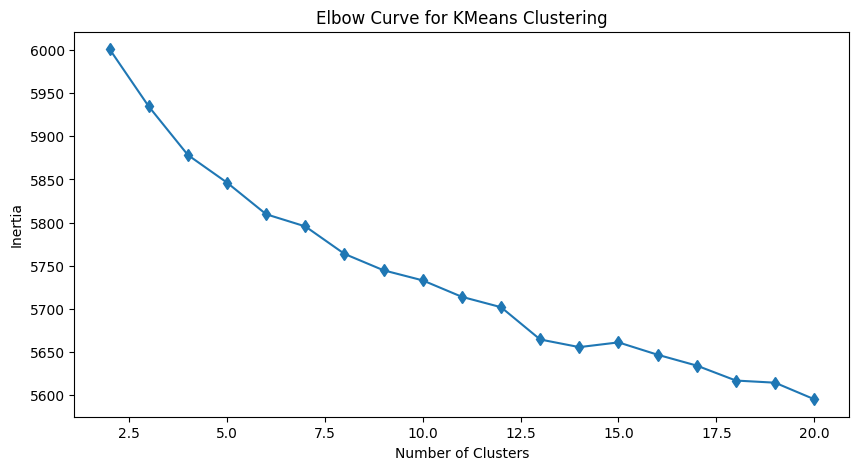

In [ ]:
# Plot the elbow curve for determining the optimum cluster:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(range(2, 21), inertia, marker='d')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')
ax.set_title('Elbow Curve for KMeans Clustering')

**From the Elbow curve it showing that 14 cluster will be optimum. Now lets coinfirm it by plotting silhouette curve.**

#**Elbow Curve silhouette curve:**

The silhouette coefficient is a metric used to evaluate the quality of clustering in a dataset. It measures how well each data point fits into its assigned cluster, based on the distance between the data point and other points in its own cluster versus the distance between the data point and points in neighboring clusters.

The silhouette coefficient ranges from -1 to 1, where a score of 1 indicates that the data point is very well matched to its assigned cluster, and a score of -1 indicates that the data point is poorly matched to its assigned cluster.

The silhouette curve is a plot of the average silhouette coefficient for each cluster against the number of clusters used in a k-means clustering algorithm. The curve can help in identifying the optimal number of clusters by looking for the highest average silhouette coefficient.

A high average silhouette coefficient indicates that the data points are well-clustered and that there is a clear separation between clusters. A low average silhouette coefficient indicates that the data points are poorly-clustered and that there may be overlap between clusters.

The silhouette curve is a useful tool for evaluating the quality of clustering in a dataset, and can help in identifying the optimal number of clusters to use in a k-means clustering algorithm. However, it is important to note that the silhouette coefficient may not always be a reliable metric, and should be used in conjunction with other evaluation methods.

Text(0.5, 1.0, 'Silhouette Scores for KMeans Clustering')

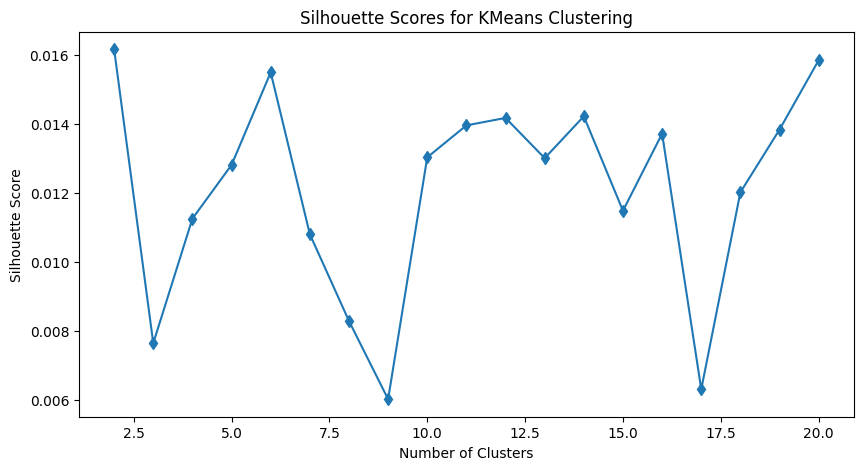

In [ ]:
# Compute silhouette scores for different number of clusters
silhouette_scores = []
for n_clusters in range(2, 21):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(pca_output)
    silhouette_avg = silhouette_score(pca_output, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10,5))
plt.plot(range(2, 21), silhouette_scores, marker='d')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for KMeans Clustering')

**From silhouette curve its showing at cluster 6 having maximum value, less cluster than Elbow meathod. So we will doing our calcultion at 6 clusters**

In [ ]:
# Predict the 6  clusters by Kmean:
final_km = KMeans(n_clusters=6, random_state=42)
final_result_km = final_km.fit_predict(pca_output)

In [ ]:
final_result_km

array([4, 0, 0, ..., 5, 4, 5], dtype=int32)

In [ ]:
# Labelling the dataframe by adding new column:
df['kmeans_cluster'] = final_km.labels_

<Axes: xlabel='kmeans_cluster', ylabel='count'>

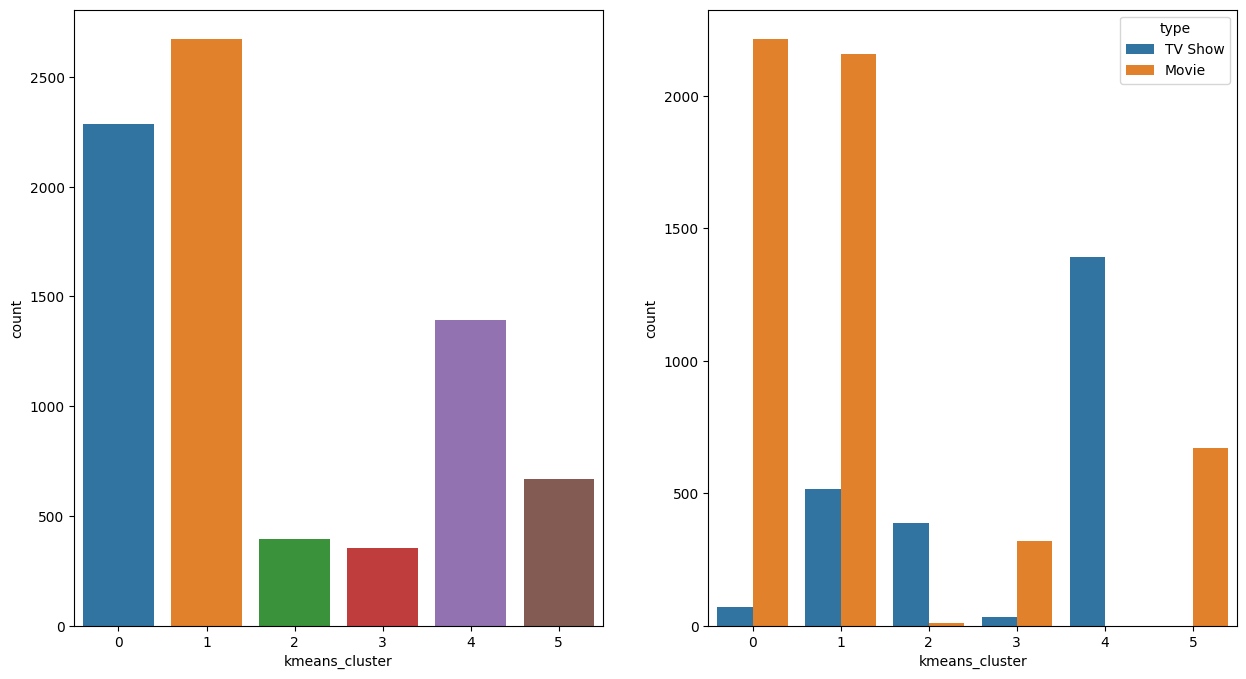

In [ ]:
# Ploting the count plot:
fig,axes = plt.subplots(1,2,figsize=(15,8))
sns.countplot(data=df,x='kmeans_cluster',ax=axes[0])
sns.countplot(data=df,x='kmeans_cluster',hue='type',ax=axes[1])

In [ ]:
# Function for word cloud:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(column_of_words):
    """
    Generate a word cloud from a column of words.
    """
    # Concatenate all the words into a single string
    text = ' '.join(column_of_words)
    
    # Create a WordCloud object with custom parameters
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          min_font_size=10).generate(text)
    
    # Display the generated word cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


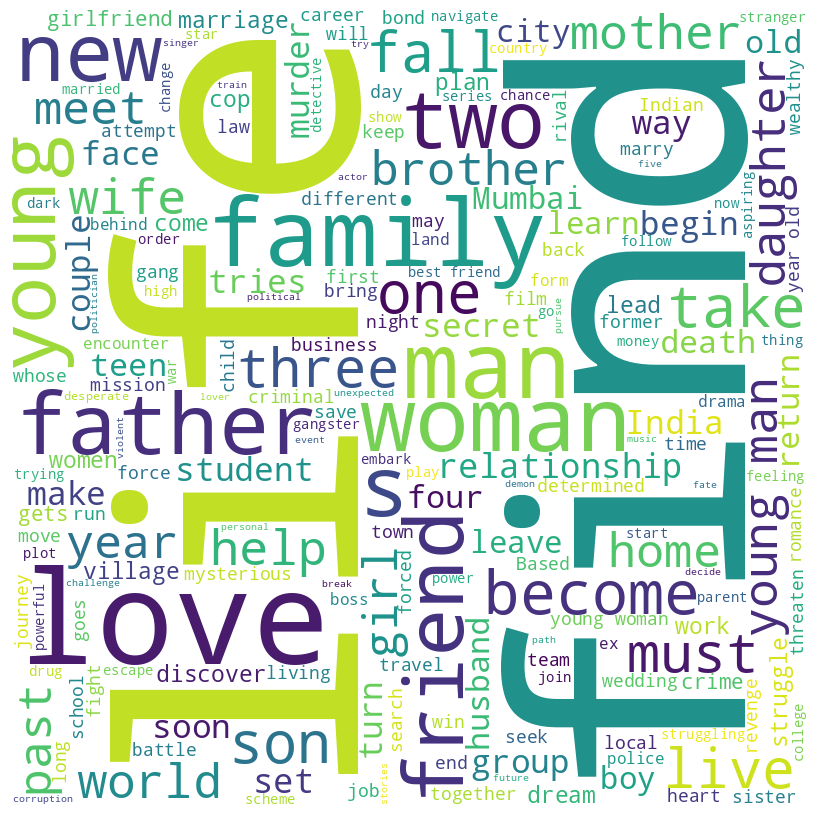

In [ ]:
 # Cluster 1:
 generate_word_cloud( df.loc[df['kmeans_cluster']== 0,'description'])

**Cluster_1: life, love, friend, young, family, man, women, daughter, relationship etc.

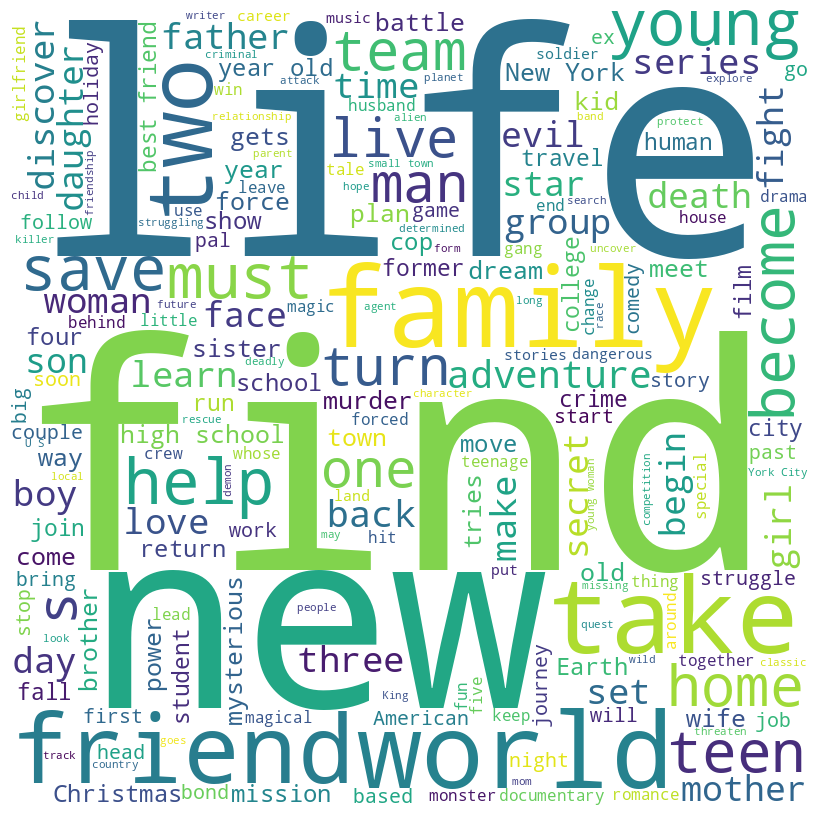

In [ ]:
# Cluster 2:
generate_word_cloud( df.loc[df['kmeans_cluster']== 1,'description'])

**cluster_2: friend, world, teen, family, team, become, home, mysterious, fight, adventure etc.

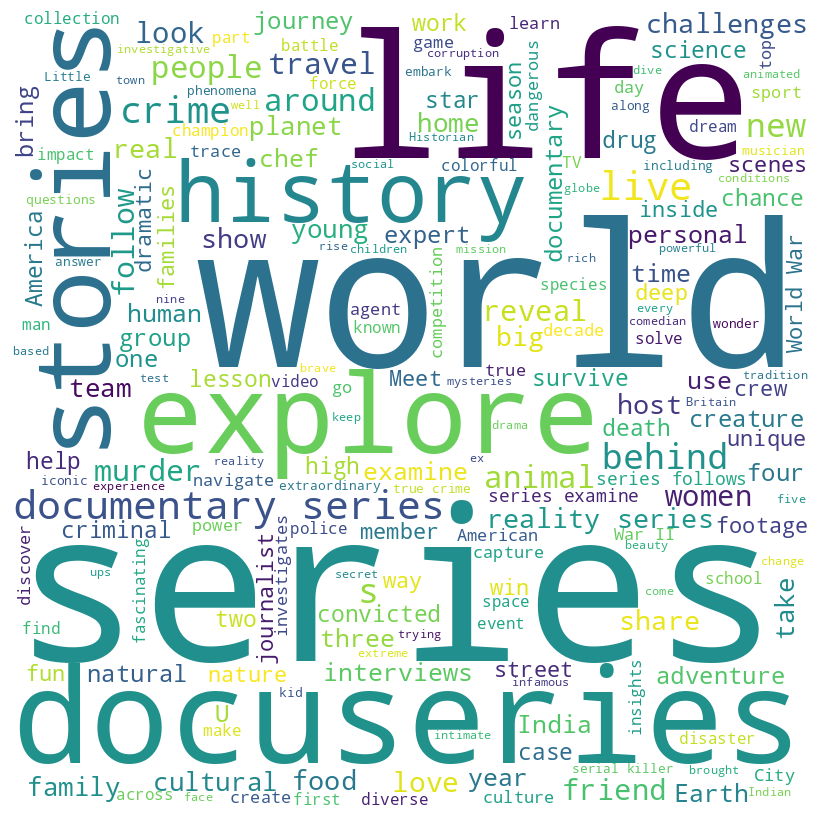

In [ ]:
# Cluster 3:
generate_word_cloud( df.loc[df['kmeans_cluster']== 2,'description'])

**Cluster_3: history, world, explore, docuseries, stories, explore, documentary, journalist, expert, travel etc.

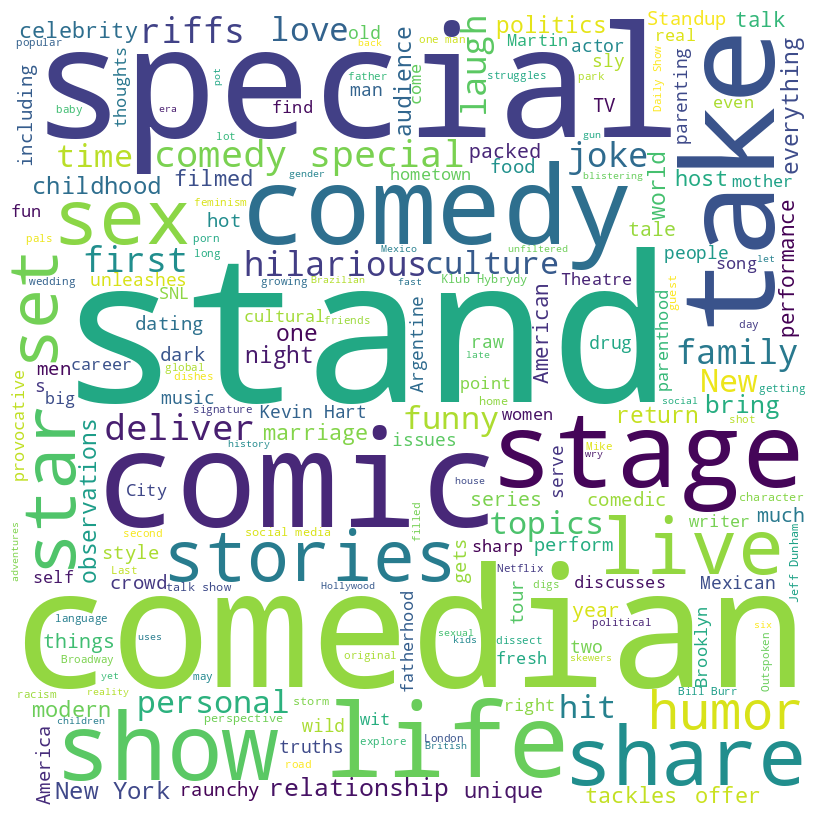

In [ ]:
# Cluster 4:
generate_word_cloud( df.loc[df['kmeans_cluster']== 3,'description'])

**Cluster_4: comic, stage, show, comedian, humor, sex, hilarious, special, joke etc.**

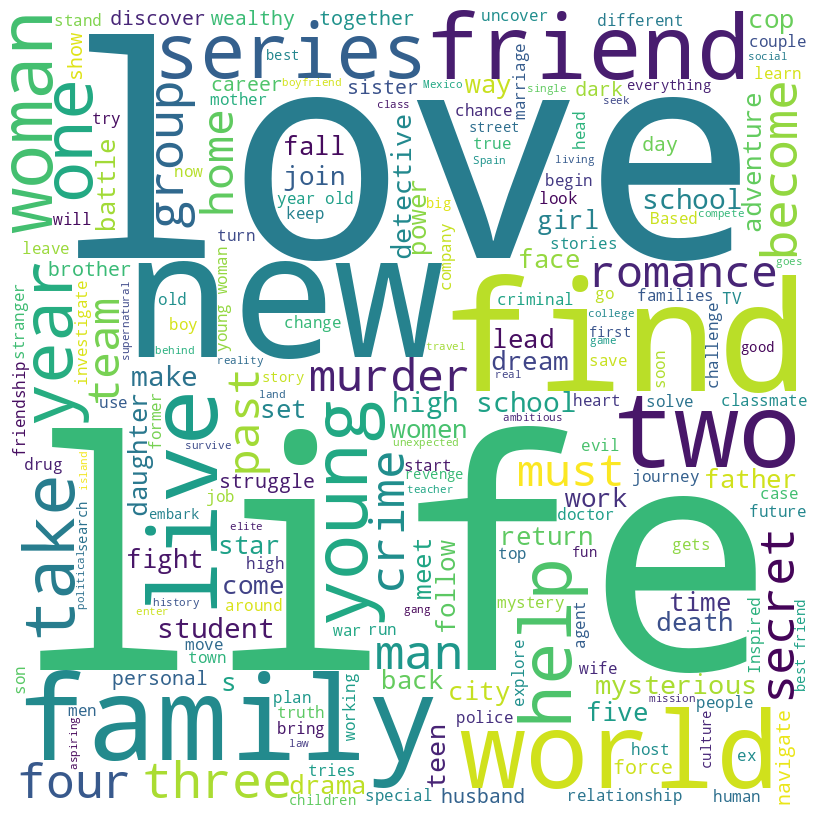

In [ ]:
 # Cluster 5:
 generate_word_cloud( df.loc[df['kmeans_cluster']== 4,'description'])

**cluster_5: series, love, friend, family, world, crime, murder, detective, romance, adventure, secret etc**

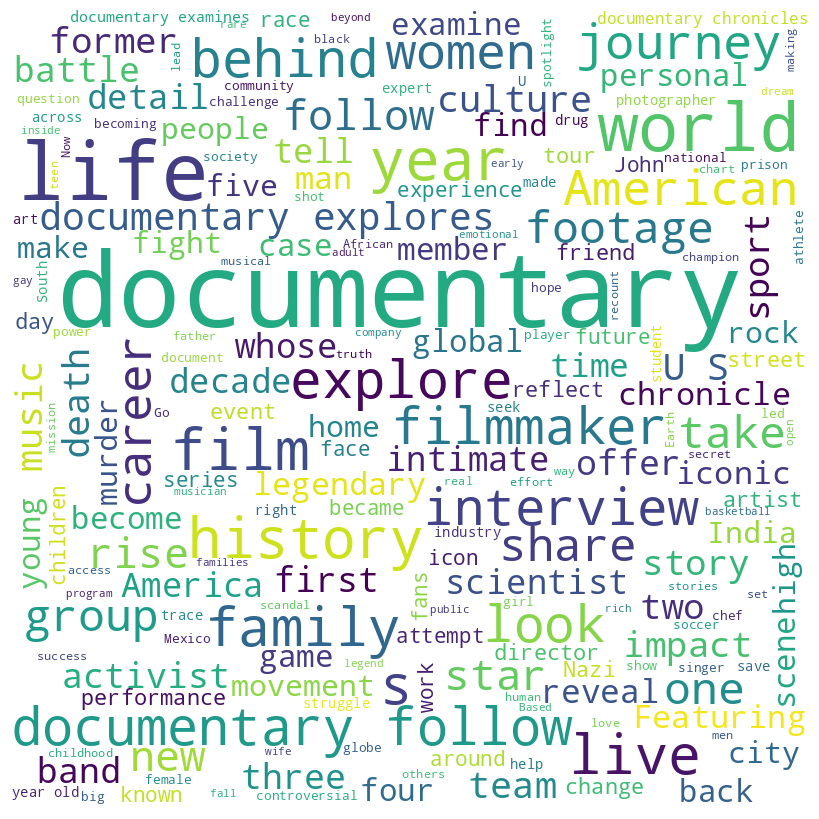

In [ ]:
 # Cluster 6:
 generate_word_cloud( df.loc[df['kmeans_cluster']== 5,'description'])

**Cluster_6: documentry, explore, filmaker, journey, American, interview, history, career, world, activist etc**

#**Hierarchical clustering:**

Hierarchical clustering is a popular clustering algorithm in machine learning used to group similar data points into clusters. The algorithm creates a hierarchy of clusters by recursively splitting or merging clusters until a stopping criterion is met.

There are two main types of hierarchical clustering: agglomerative and divisive. Agglomerative clustering starts with each data point in a separate cluster and then merges the closest pairs of clusters, iteratively forming larger clusters until all the data points are in a single cluster. Divisive clustering starts with all the data points in a single cluster and then recursively splits the cluster into smaller clusters until each data point is in a separate cluster.

Hierarchical clustering can be represented visually using a dendrogram, which is a tree-like diagram that shows the hierarchy of clusters. The dendrogram can be used to visualize the relationship between clusters and to identify natural groupings in the data.

Hierarchical clustering has several advantages over other clustering algorithms, such as not requiring the number of clusters to be specified beforehand and being able to handle non-linearly separable data. However, it can be computationally expensive and may not scale well to very large datasets.

Overall, hierarchical clustering is a powerful and widely used clustering algorithm that can help in identifying natural groupings within a dataset.

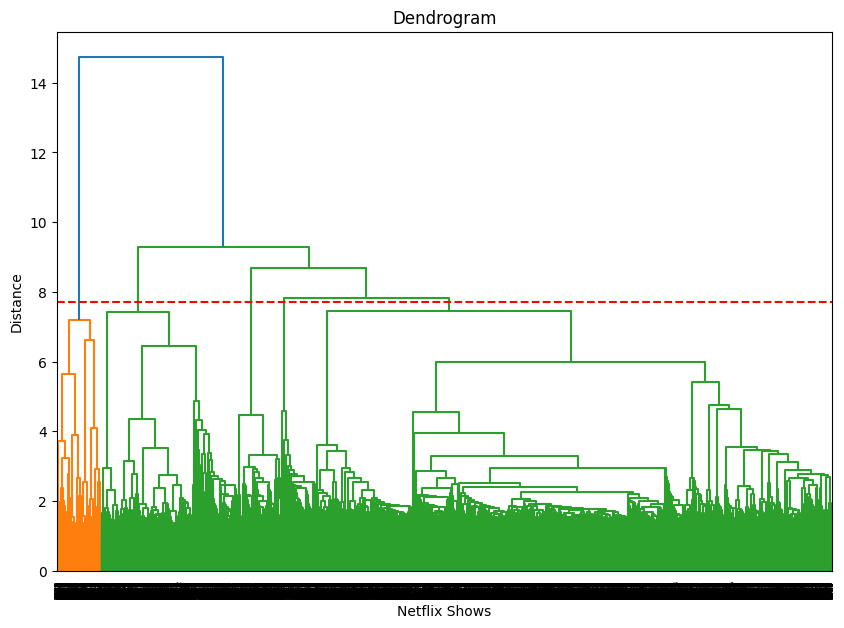

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(pca_output, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 7.7, color='r', linestyle='--')

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(pca_output)

array([0, 0, 2, ..., 3, 1, 3])

In [ ]:
df['hierarchical_cluster'] = hierarchical.labels_

<Axes: xlabel='hierarchical_cluster', ylabel='count'>

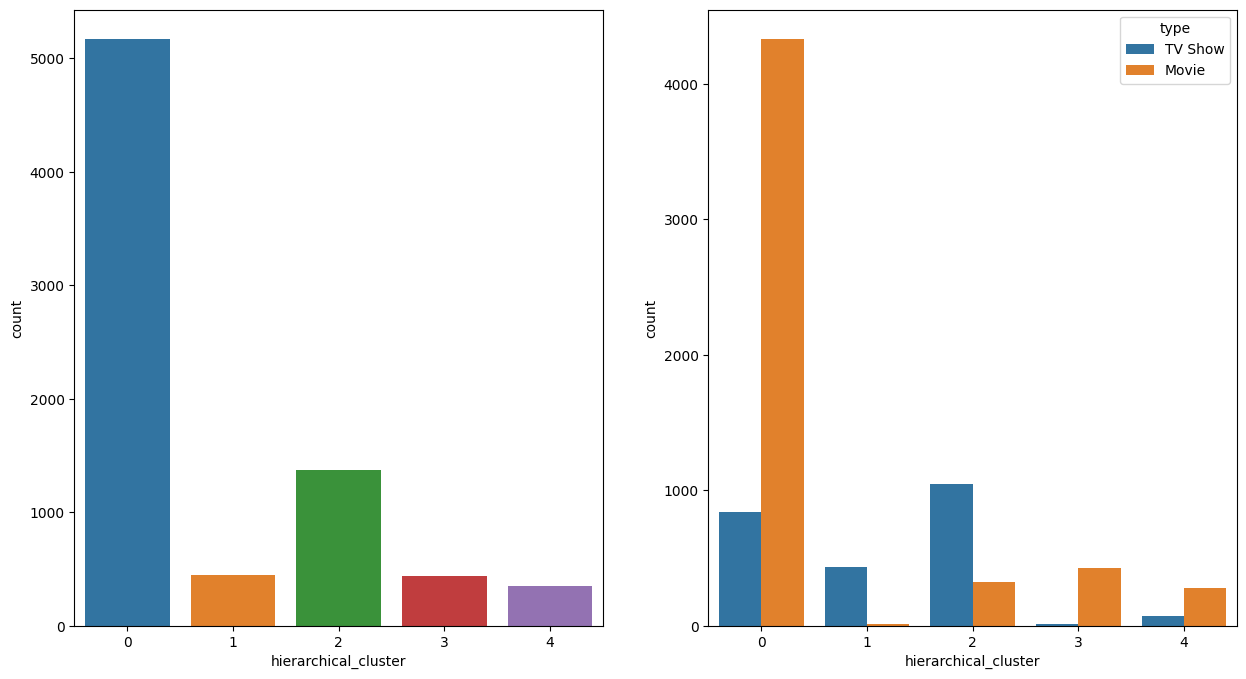

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(15,8))
sns.countplot(data=df,x='hierarchical_cluster',ax=axes[0])
sns.countplot(data=df,x='hierarchical_cluster',hue='type',ax=axes[1])

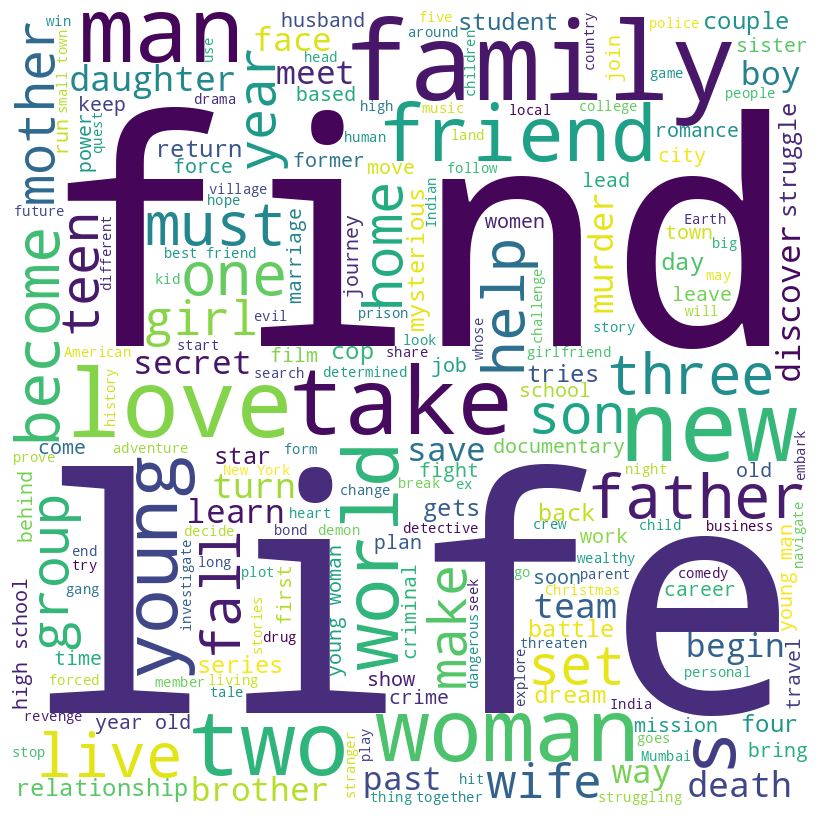

In [ ]:
 # Cluster_1:
 generate_word_cloud( df.loc[df['hierarchical_cluster']== 0,'description'])

**Cluster_1: life, love, family, friend, man, women, son, father, young etc**

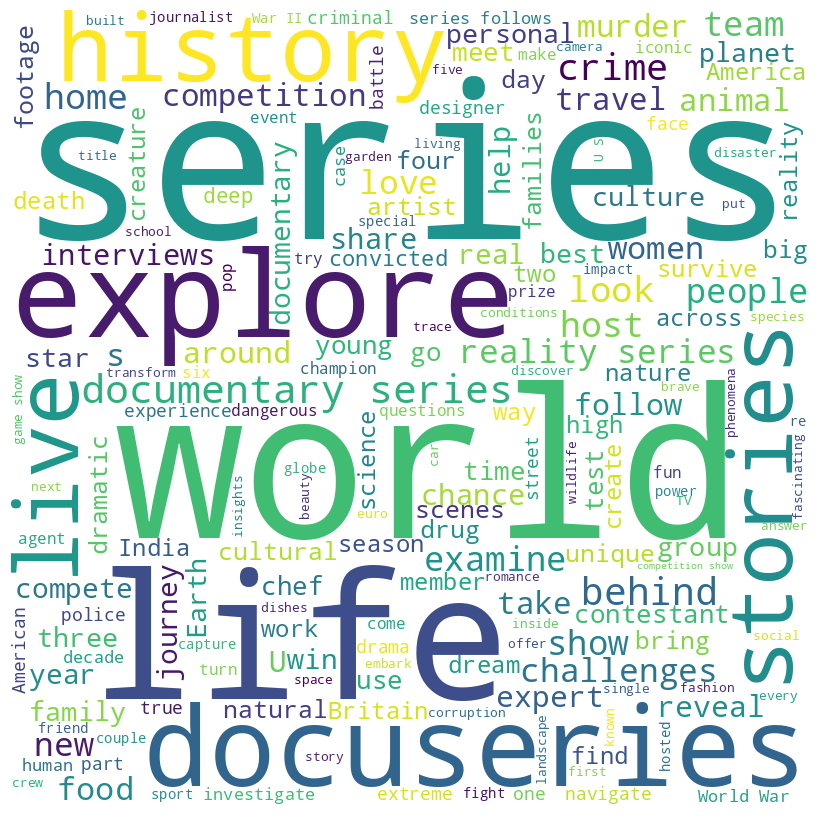

In [ ]:
 # Cluster_2:
 generate_word_cloud( df.loc[df['hierarchical_cluster']== 1,'description'])

**Cluster_2: History, series,explore,docuseries, world, stories, documentry, explore etc**

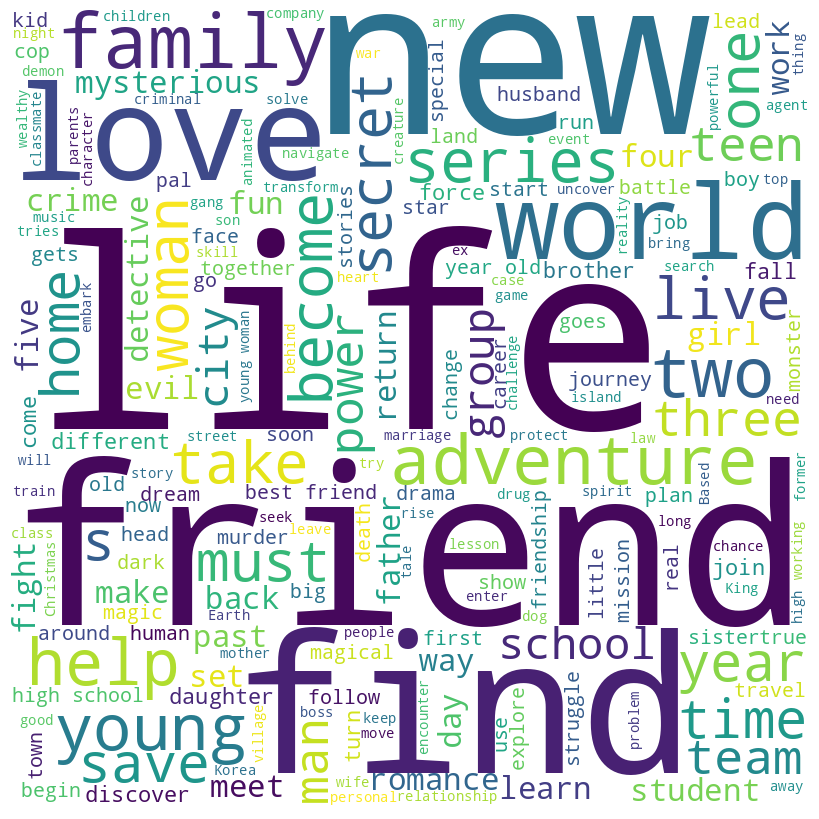

In [ ]:
 # Cluster_3:
 generate_word_cloud( df.loc[df['hierarchical_cluster']== 2,'description'])

**Cluster_3: love, friend, adventure, world, series, power, secret, young, home, teen etc**

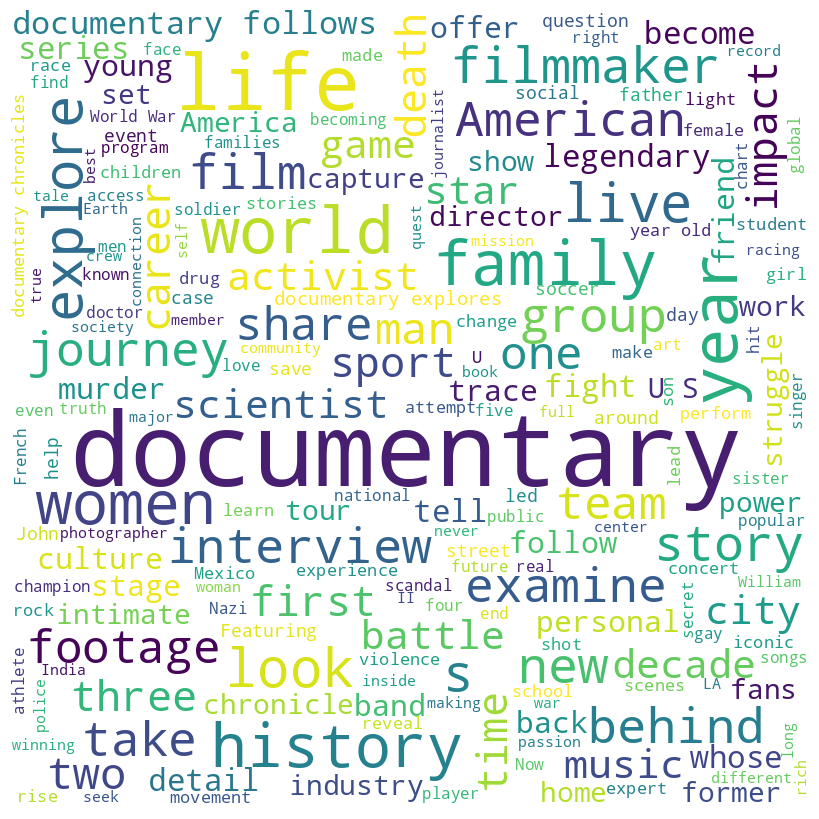

In [ ]:
 # Cluster_4:
 generate_word_cloud( df.loc[df['hierarchical_cluster']== 3,'description'])

**Cluster_4: documentry, interview, examine, history, journey, explore, filmmaker, women, footage year, activist etc**

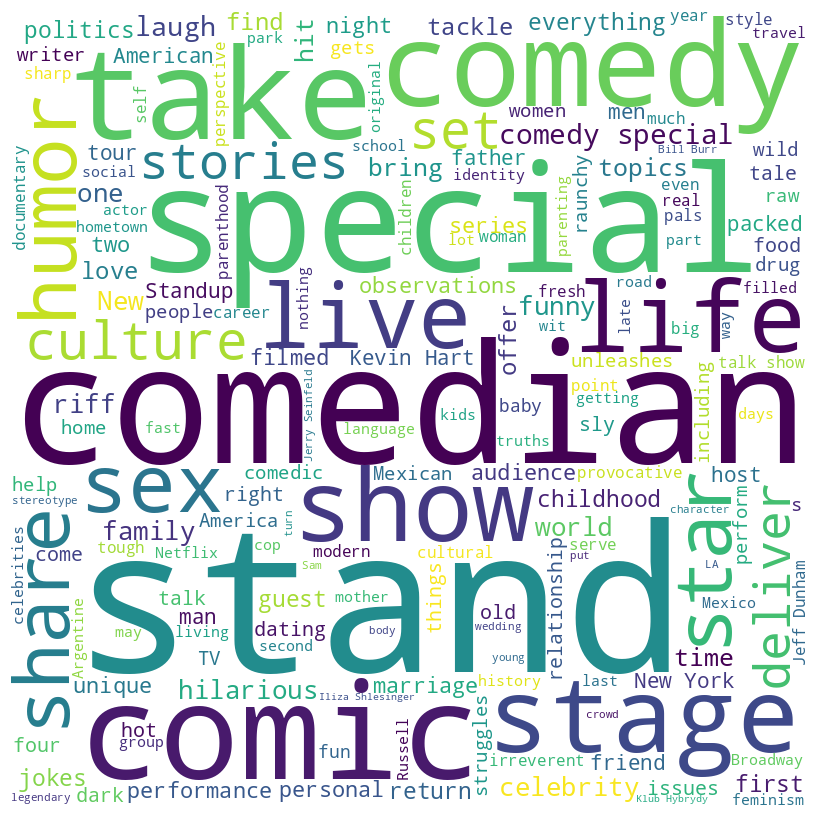

In [ ]:
 # Cluster_5:
 generate_word_cloud( df.loc[df['hierarchical_cluster']== 4,'description'])

**Cluster_5: Comedian, Stage, comedy, show, sex, special, comic, humor, laugh, funny, hilarious etc.**

##**Final Conclusion:**

*  **The aim of this project is to cluster the TV shows and Movies according to the similarities between them.**
*   **The dataset has the shape of (7787,12) and becomes 7770,12 after outliers removal.**
*   **Indian cast has more number of production they worked for as compared to other country.**
*   **In netfliex dataset United States has more no in total production as compared to other countries folowed by India.**
*   **Majority of movies distributed between 75 min to 125 min, on other hand majority of TV shows as only listed as one season.**

*   **In year 2020, total no of TV shows becomes ahead to the movies, concludes that netflix more focuses on TV shows rather than movies.**

*   **United States has produces majority of movie production, so it includes all the genres. Except Anime and International movies. Japan is famous for its Anime feature and India is famous for Internatinal movies.**
*  **During year 1969, movies are produced having average length of 228 min which is huge as compared to oher years.**


*  **During the clustring we have consider only cast, country, director, rating and listed in.**

*  **We have only consider only top 20,000 attributes during TF-IDF Vectorizor.**
*   **To reduce the dimensionality we have used PCA (Principal Component Analysis), reduce the dimension to 3000 attributes.**

*   **KN Means and Hierarchical clustering algorithms are used.**
*   **6 and 4 Clusters i have chosen in K means and Hierarchical clustering.**







